In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import ttest_ind
from numpy import std
#from sklearn.linear_model import LogisticRegression
#from sklearn.tree import DecisionTreeClassfifier
#from sklearn.ensemble import RandomForestClassifier  
#from xgboost import XGBClassifier
#from sklearn.model_selection import train_test_split, RepeatedKFold, GridSearchCV, cross_val_score

In [5]:
df = pd.read_csv("Data2.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1706 entries, 0 to 1705
Data columns (total 16 columns):
pid            1706 non-null int64
w3_region      1706 non-null object
w3_age         1706 non-null int64
w3_gen         1706 non-null object
w3_b1          1706 non-null object
w2_region      1706 non-null object
hhid           1706 non-null int64
w2_age         1706 non-null int64
w2_gen         1706 non-null object
w2_b1          1706 non-null object
w1_region      1706 non-null object
w1_gen         1706 non-null object
w1_age         1706 non-null int64
w1_smk_type    1700 non-null object
w2_smk_type    1620 non-null object
w3_smk_type    1633 non-null object
dtypes: int64(5), object(11)
memory usage: 213.3+ KB


In [4]:
def rstr(df, pred=None): 
    obs = df.shape[0]
    types = df.dtypes
    counts = df.apply(lambda x: x.count())
    uniques = df.apply(lambda x: [x.unique()])
    nulls = df.apply(lambda x: x.isnull().sum())
    distincts = df.apply(lambda x: x.unique().shape[0])
    missing_ration = (df.isnull().sum()/ obs) * 100
    skewness = df.skew()
    kurtosis = df.kurt() 
    print('Data shape:', df.shape)
    
    if pred is None:
        cols = ['types', 'counts', 'distincts', 'nulls', 'missing ration', 'uniques', 'skewness', 'kurtosis']
        str = pd.concat([types, counts, distincts, nulls, missing_ration, uniques, skewness, kurtosis], axis = 1)

    else:
        corr = df.corr()[pred]
        str = pd.concat([types, counts, distincts, nulls, missing_ration, uniques, skewness, kurtosis, corr], axis = 1, sort=False)
        corr_col = 'corr '  + pred
        cols = ['types', 'counts', 'distincts', 'nulls', 'missing_ration', 'uniques', 'skewness', 'kurtosis', corr_col ]
    
    str.columns = cols
    dtypes = str.types.value_counts()
    print('___________________________\nData types:\n',str.types.value_counts())
    print('___________________________')
    return str

In [5]:
df.head(10)

,pid,w3_region,w3_age,w3_gen,w3_b1,w2_region,hhid,w2_age,w2_gen,w2_b1,w1_region,w1_gen,w1_age,w1_smk_type,w2_smk_type,w3_smk_type
0,23,Tbilisi,82,Male,"No, I did not",Tbilisi,23,82,Male,"No, I did not",Tbilisi,Male,81,Filtered cigarettes,Filtered cigarettes only,Unfiltered cigarettes only
1,26,Kutaisi,45,Male,"No, I did not",Kutaisi,26,44,Male,"No, I did not",Kutaisi,Male,41,Filtered cigarettes,Filtered cigarettes only,Filtered cigarettes only
2,28,Kutaisi,47,Male,"No, I did not",Kutaisi,28,46,Male,"No, I did not",Kutaisi,Male,45,Filtered cigarettes,Filtered cigarettes only,Filtered cigarettes only
3,29,Gori,29,Male,Yes I gave up,Gori,29,30,Male,"No, I did not",Gori,Male,27,Filtered cigarettes,Filtered cigarettes only,NaN
4,31,Gori,43,Male,"No, I did not",Gori,31,42,Male,"No, I did not",Gori,Male,41,Filtered cigarettes,Filtered cigarettes only,Filtered cigarettes only
5,35,Gori,39,Male,"No, I did not",Gori,35,38,Male,"No, I did not",Gori,Male,37,Filtered cigarettes,Unfiltered cigarettes only,Filtered cigarettes only
6,36,Gori,50,Male,"No, I did not",Gori,36,50,Male,"No, I did not",Gori,Male,49,Filtered cigarettes,Filtered cigarettes only,Filtered cigarettes only
7,37,Gori,36,Male,Yes I gave up,Gori,37,36,Male,"No, I did not",Gori,Male,34,Both filtered & non-filtered,Unfiltered cigarettes only,NaN
8,40,Gori,52,Male,"No, I did not",Gori,40,51,Male,"No, I did not",Gori,Male,51,Filtered cigarettes,Unfiltered cigarettes only,RYO only
9,42,Gori,66,Male,Yes I gave up,Gori,42,66,Male,"No, I did not",Gori,Male,65,Filtered cigarettes,Unfiltered cigarettes only,NaN


In [6]:
rstr(df)

Data shape: (1706, 16)
___________________________
Data types:
 object    11
int64      5
Name: types, dtype: int64
___________________________


/Users/simonyanaleksandr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app


,types,counts,distincts,nulls,missing ration,uniques,skewness,kurtosis
hhid,int64,1706,1706,0,0.000000,"[[23, 26, 28, 29, 31, 35, 36, 37, 40, 42, 45, ...",0.004974,-1.279048
pid,int64,1706,1706,0,0.000000,"[[23, 26, 28, 29, 31, 35, 36, 37, 40, 42, 45, ...",0.004974,-1.279048
w1_age,int64,1706,67,0,0.000000,"[[81, 41, 45, 27, 37, 49, 34, 51, 65, 42, 47, ...",0.244136,-0.654323
w1_gen,object,1706,2,0,0.000000,"[[Male, Female]]",NaN,NaN
w1_region,object,1706,5,0,0.000000,"[[Tbilisi, Kutaisi, Gori, Zugdidi, Akhaltsikhe]]",NaN,NaN
w1_smk_type,object,1700,7,6,0.351700,"[[Filtered cigarettes, Both filtered & non-fil...",NaN,NaN
w2_age,int64,1706,67,0,0.000000,"[[82, 44, 46, 30, 42, 38, 50, 36, 51, 66, 43, ...",0.237204,-0.657602
w2_b1,object,1706,2,0,0.000000,"[[No, I did not, Yes I gave up]]",NaN,NaN
w2_gen,object,1706,2,0,0.000000,"[[Male, Female]]",NaN,NaN
w2_region,object,1706,5,0,0.000000,"[[Tbilisi, Kutaisi, Gori, Zugdidi, Akhaltsikhe]]",NaN,NaN


In [7]:
df.describe()

,pid,w3_age,hhid,w2_age,w1_age
count,1706.000000,1706.000000,1706.000000,1706.000000,1706.000000
mean,2201.708675,45.271981,2201.708675,44.906213,43.669988
std,1270.715265,14.210190,1270.715265,14.257395,14.254684
min,23.000000,19.000000,23.000000,19.000000,18.000000
25%,1096.750000,34.000000,1096.750000,33.000000,32.000000
50%,2163.500000,44.000000,2163.500000,44.000000,43.000000
75%,3430.000000,56.000000,3430.000000,56.000000,55.000000
max,4345.000000,87.000000,4345.000000,87.000000,86.000000


In [8]:
df.head(100
       )

,pid,w3_region,w3_age,w3_gen,w3_b1,w2_region,hhid,w2_age,w2_gen,w2_b1,w1_region,w1_gen,w1_age,w1_smk_type,w2_smk_type,w3_smk_type
0,23,Tbilisi,82,Male,"No, I did not",Tbilisi,23,82,Male,"No, I did not",Tbilisi,Male,81,Filtered cigarettes,Filtered cigarettes only,Unfiltered cigarettes only
1,26,Kutaisi,45,Male,"No, I did not",Kutaisi,26,44,Male,"No, I did not",Kutaisi,Male,41,Filtered cigarettes,Filtered cigarettes only,Filtered cigarettes only
2,28,Kutaisi,47,Male,"No, I did not",Kutaisi,28,46,Male,"No, I did not",Kutaisi,Male,45,Filtered cigarettes,Filtered cigarettes only,Filtered cigarettes only
3,29,Gori,29,Male,Yes I gave up,Gori,29,30,Male,"No, I did not",Gori,Male,27,Filtered cigarettes,Filtered cigarettes only,NaN
4,31,Gori,43,Male,"No, I did not",Gori,31,42,Male,"No, I did not",Gori,Male,41,Filtered cigarettes,Filtered cigarettes only,Filtered cigarettes only
5,35,Gori,39,Male,"No, I did not",Gori,35,38,Male,"No, I did not",Gori,Male,37,Filtered cigarettes,Unfiltered cigarettes only,Filtered cigarettes only
6,36,Gori,50,Male,"No, I did not",Gori,36,50,Male,"No, I did not",Gori,Male,49,Filtered cigarettes,Filtered cigarettes only,Filtered cigarettes only
7,37,Gori,36,Male,Yes I gave up,Gori,37,36,Male,"No, I did not",Gori,Male,34,Both filtered & non-filtered,Unfiltered cigarettes only,NaN
8,40,Gori,52,Male,"No, I did not",Gori,40,51,Male,"No, I did not",Gori,Male,51,Filtered cigarettes,Unfiltered cigarettes only,RYO only
9,42,Gori,66,Male,Yes I gave up,Gori,42,66,Male,"No, I did not",Gori,Male,65,Filtered cigarettes,Unfiltered cigarettes only,NaN


In [9]:
df.groupby(['w3_gen','w3_region', 'w3_b1']).agg({'pid':'count'})

pid
w3_gen w3_region   w3_b1              
Female Akhaltsikhe No, I did  not   22
       Gori        No, I did  not   11
                   Yes I gave up     1
       Kutaisi     No, I did  not   16
                   Yes I gave up     1
       Tbilisi     No, I did  not  124
                   Yes I gave up     4
       Zugdidi     No, I did  not   15
                   Yes I gave up     1
Male   Akhaltsikhe No, I did  not  256
                   Yes I gave up     3
       Gori        No, I did  not  339
                   Yes I gave up    19
       Kutaisi     No, I did  not  228
                   Yes I gave up    12
       Tbilisi     No, I did  not  262
                   Yes I gave up    16
       Zugdidi     No, I did  not  361
                   Yes I gave up    15

In [10]:
df.groupby(['w2_gen','w2_region', 'w2_b1']).agg({'pid':'count'})

pid
w2_gen w2_region   w2_b1              
Female Akhaltsikhe No, I did  not   13
                   Yes I gave up     4
       Gori        No, I did  not   12
                   Yes I gave up     2
       Kutaisi     No, I did  not   16
                   Yes I gave up     3
       Tbilisi     No, I did  not  112
                   Yes I gave up    12
       Zugdidi     No, I did  not    9
Male   Akhaltsikhe No, I did  not  249
                   Yes I gave up    15
       Gori        No, I did  not  341
                   Yes I gave up    15
       Kutaisi     No, I did  not  231
                   Yes I gave up     7
       Tbilisi     No, I did  not  269
                   Yes I gave up    13
       Zugdidi     No, I did  not  370
                   Yes I gave up    13

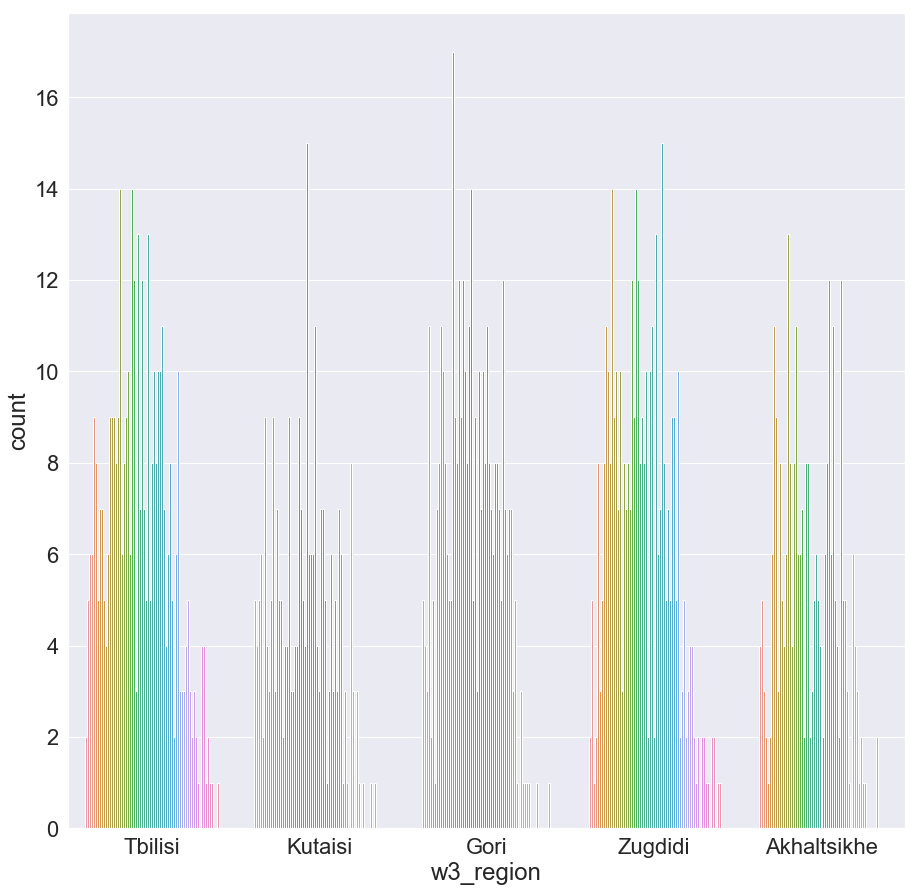

In [19]:
 plt.figure(figsize=(15,15))
sns.set(font_scale = 2)
ax = sns.countplot(data = df, x = 'w3_region', hue = 'w3_age'  )

ax.get_legend().remove()
plt.show()

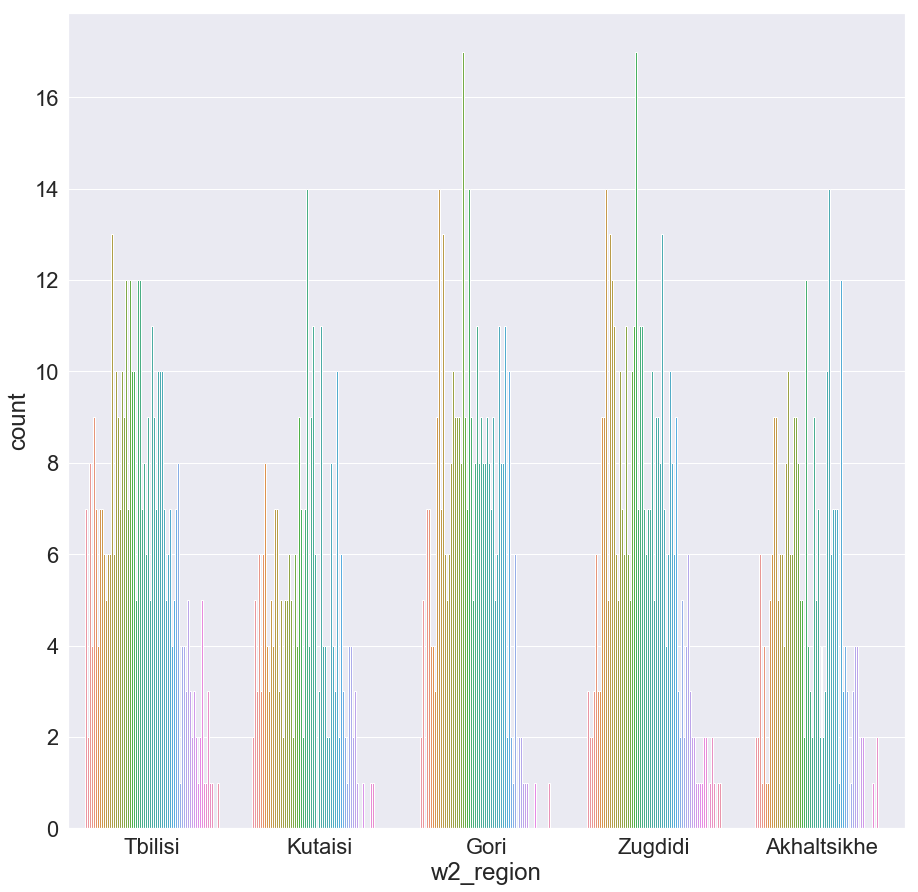

In [21]:
 plt.figure(figsize=(15,15))
sns.set(font_scale = 2)
ax = sns.countplot(data = df, x = 'w2_region', hue = 'w2_age')
ax.get_legend().remove()
plt.show()

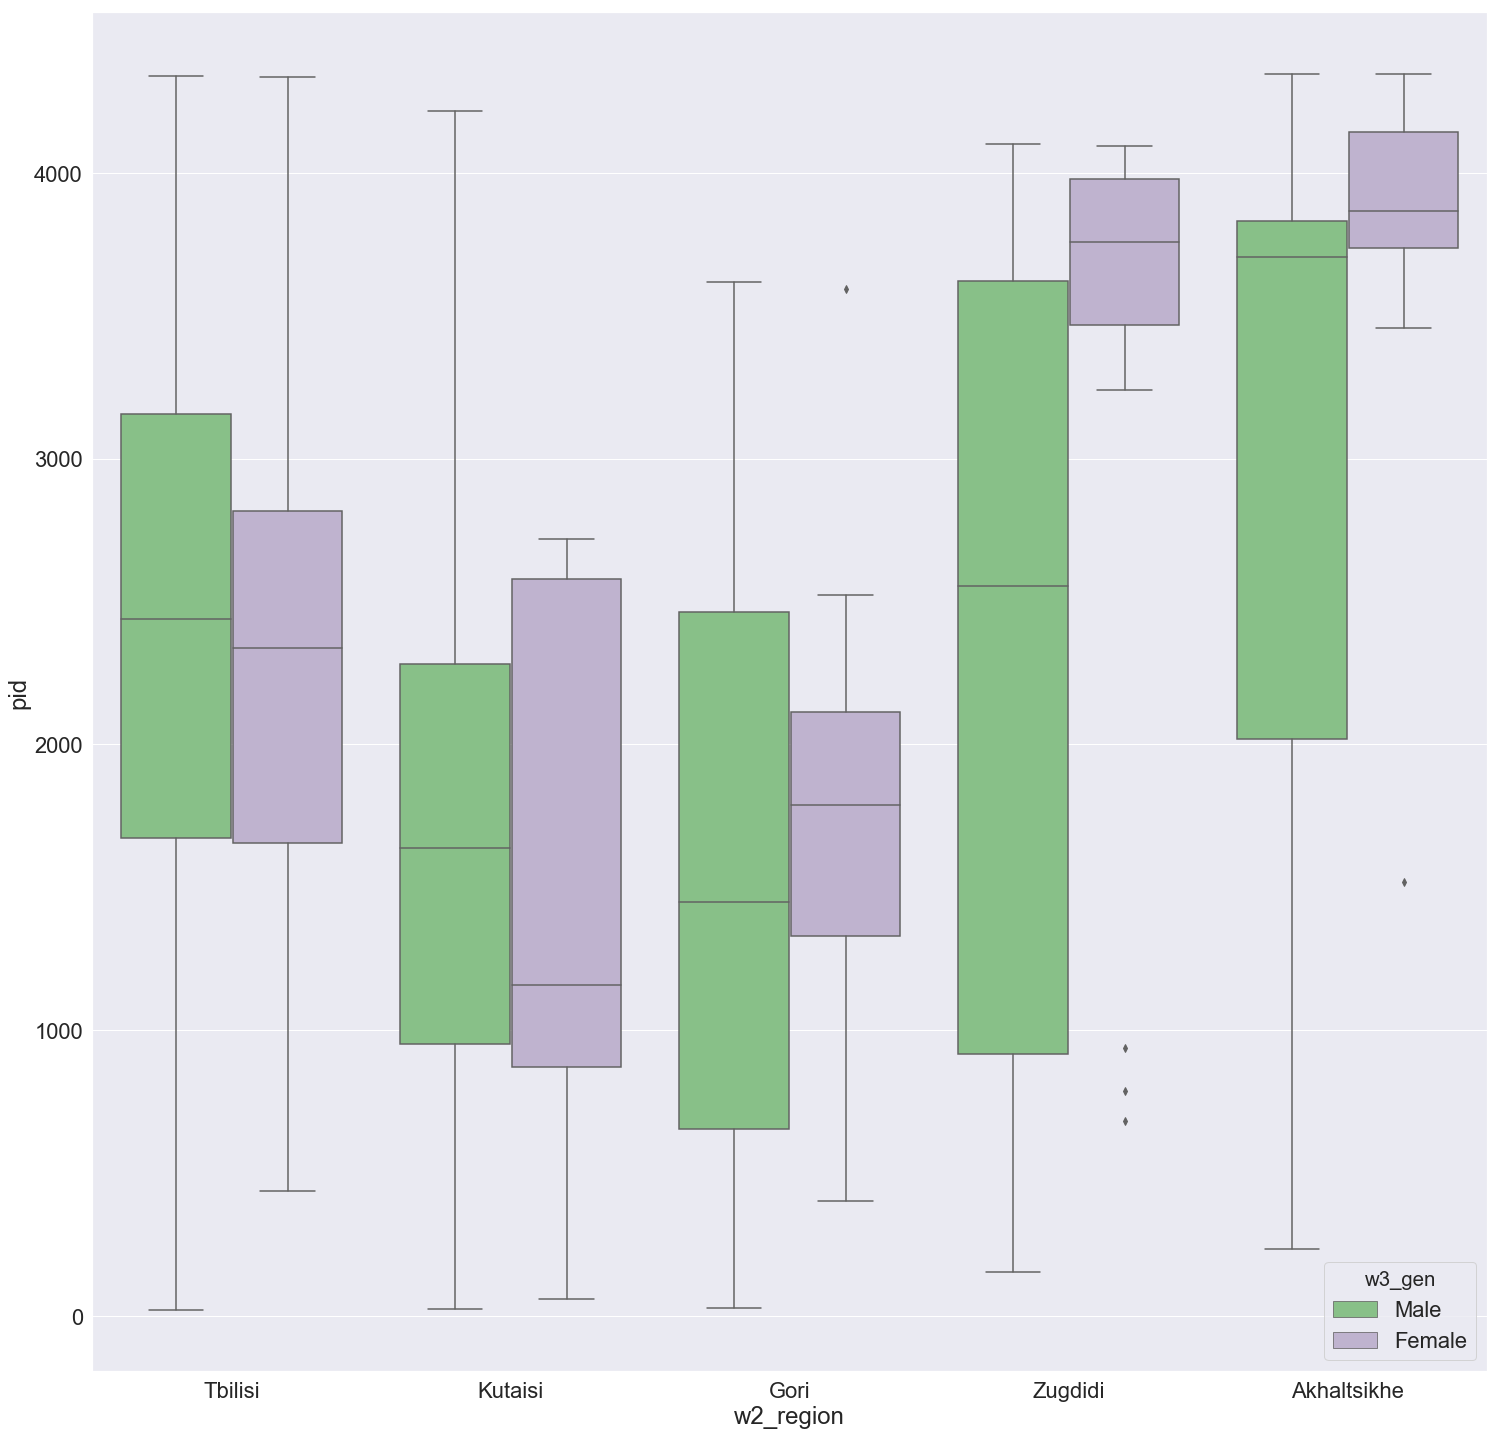

In [26]:
 plt.figure(figsize=(25,25))
sns.set(font_scale = 2)
sns.boxplot(data = df,  x = 'w2_region', y = 'pid', hue = 'w3_gen', palette='Accent')
plt.show()

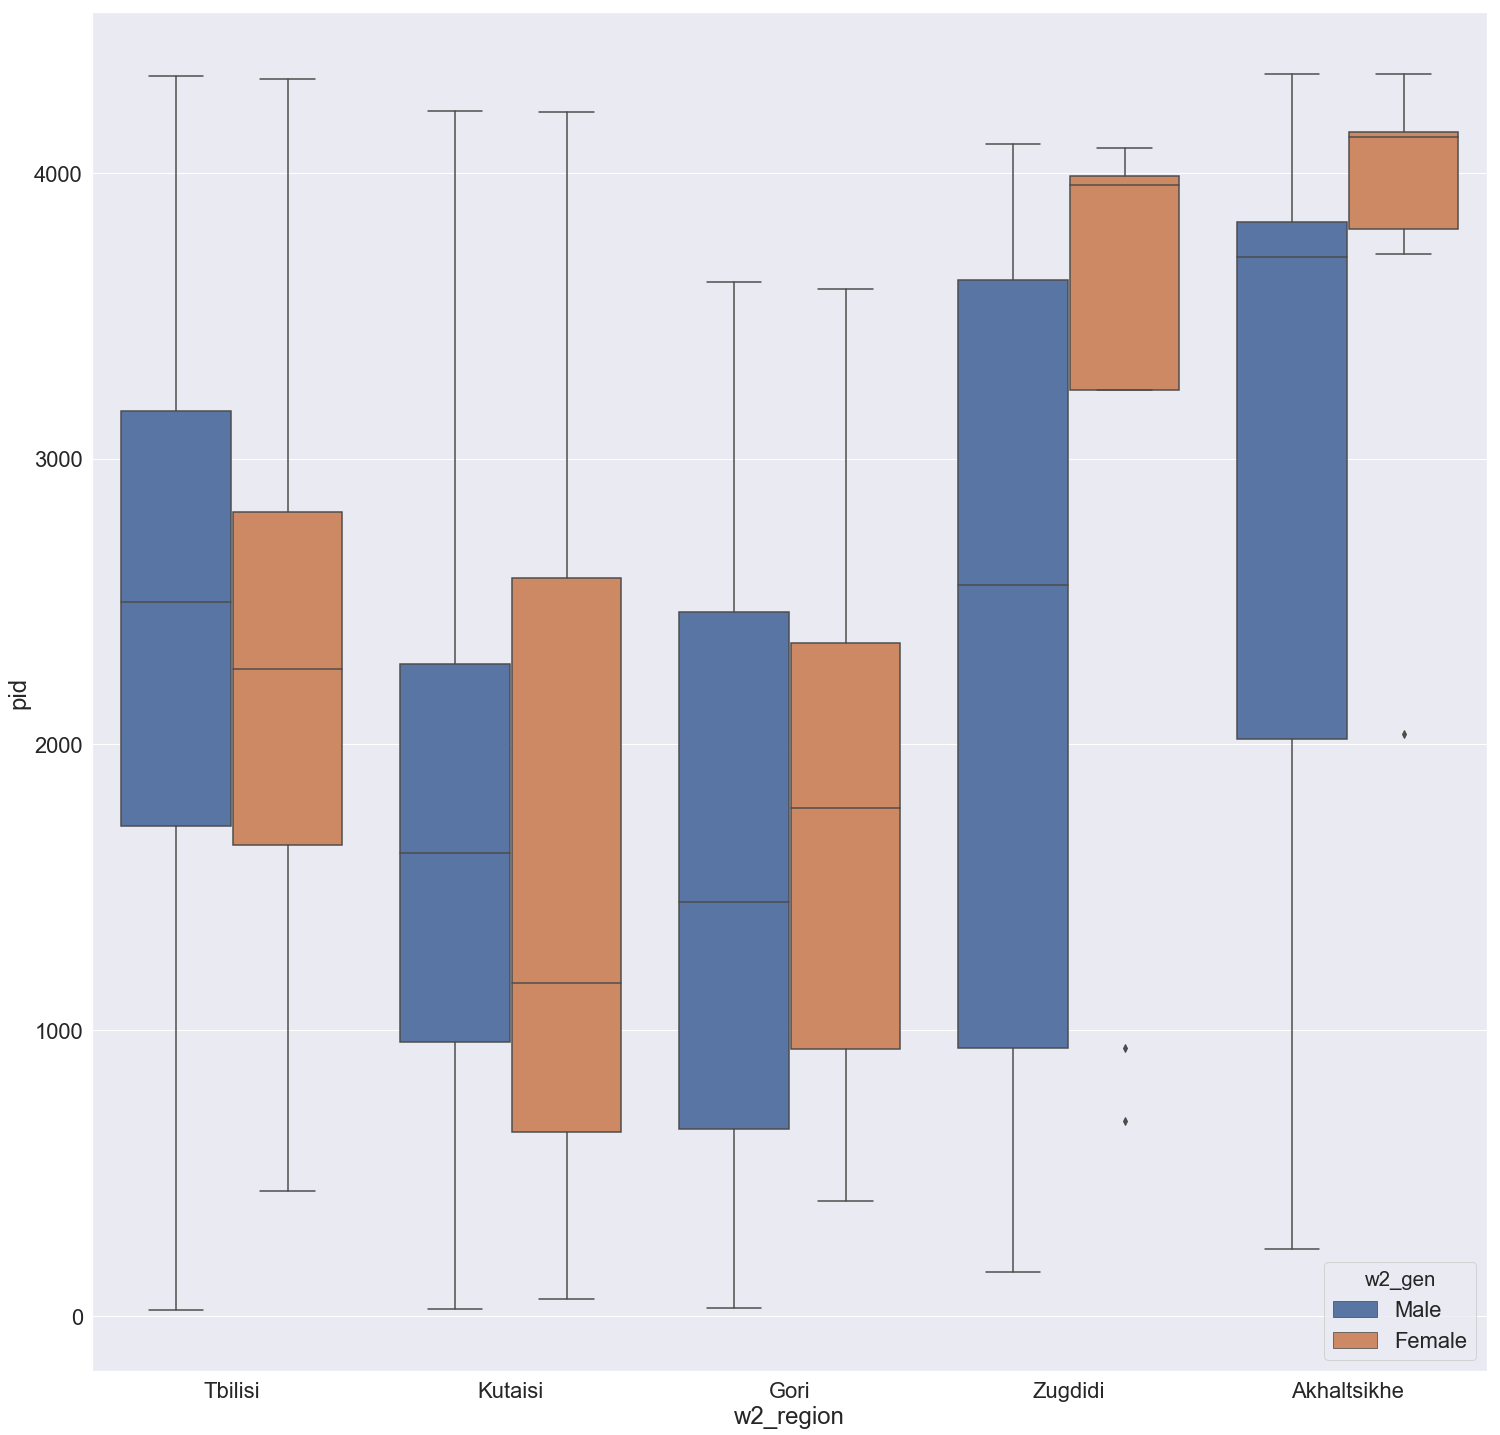

In [23]:
 plt.figure(figsize=(25,25))
sns.set(font_scale = 2)
sns.boxplot(data = df, x = 'w2_region', y = 'pid', hue = 'w2_gen')
plt.show()

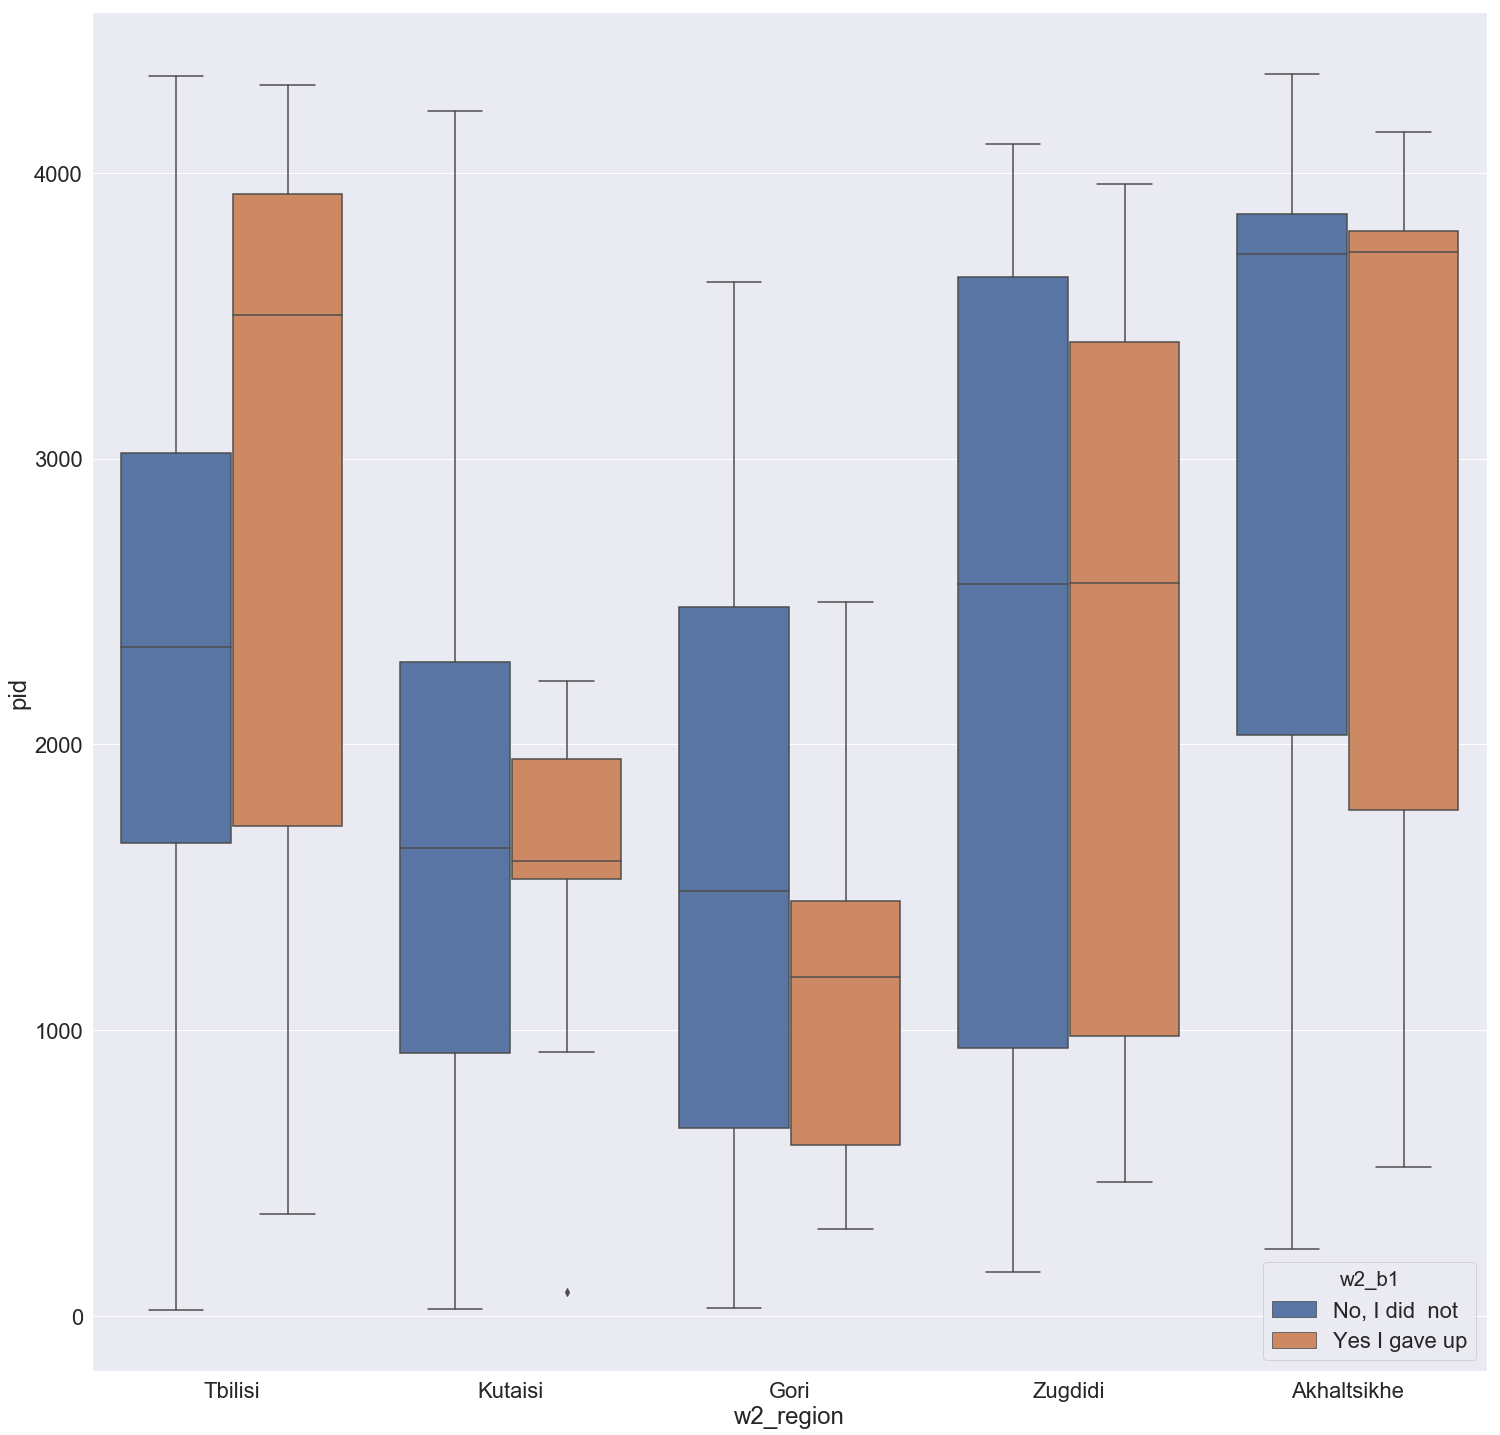

In [15]:
 plt.figure(figsize=(25,25))
sns.set(font_scale = 2)
sns.boxplot(data = df, x = 'w2_region', y = 'pid', hue = 'w2_b1' )
plt.show()

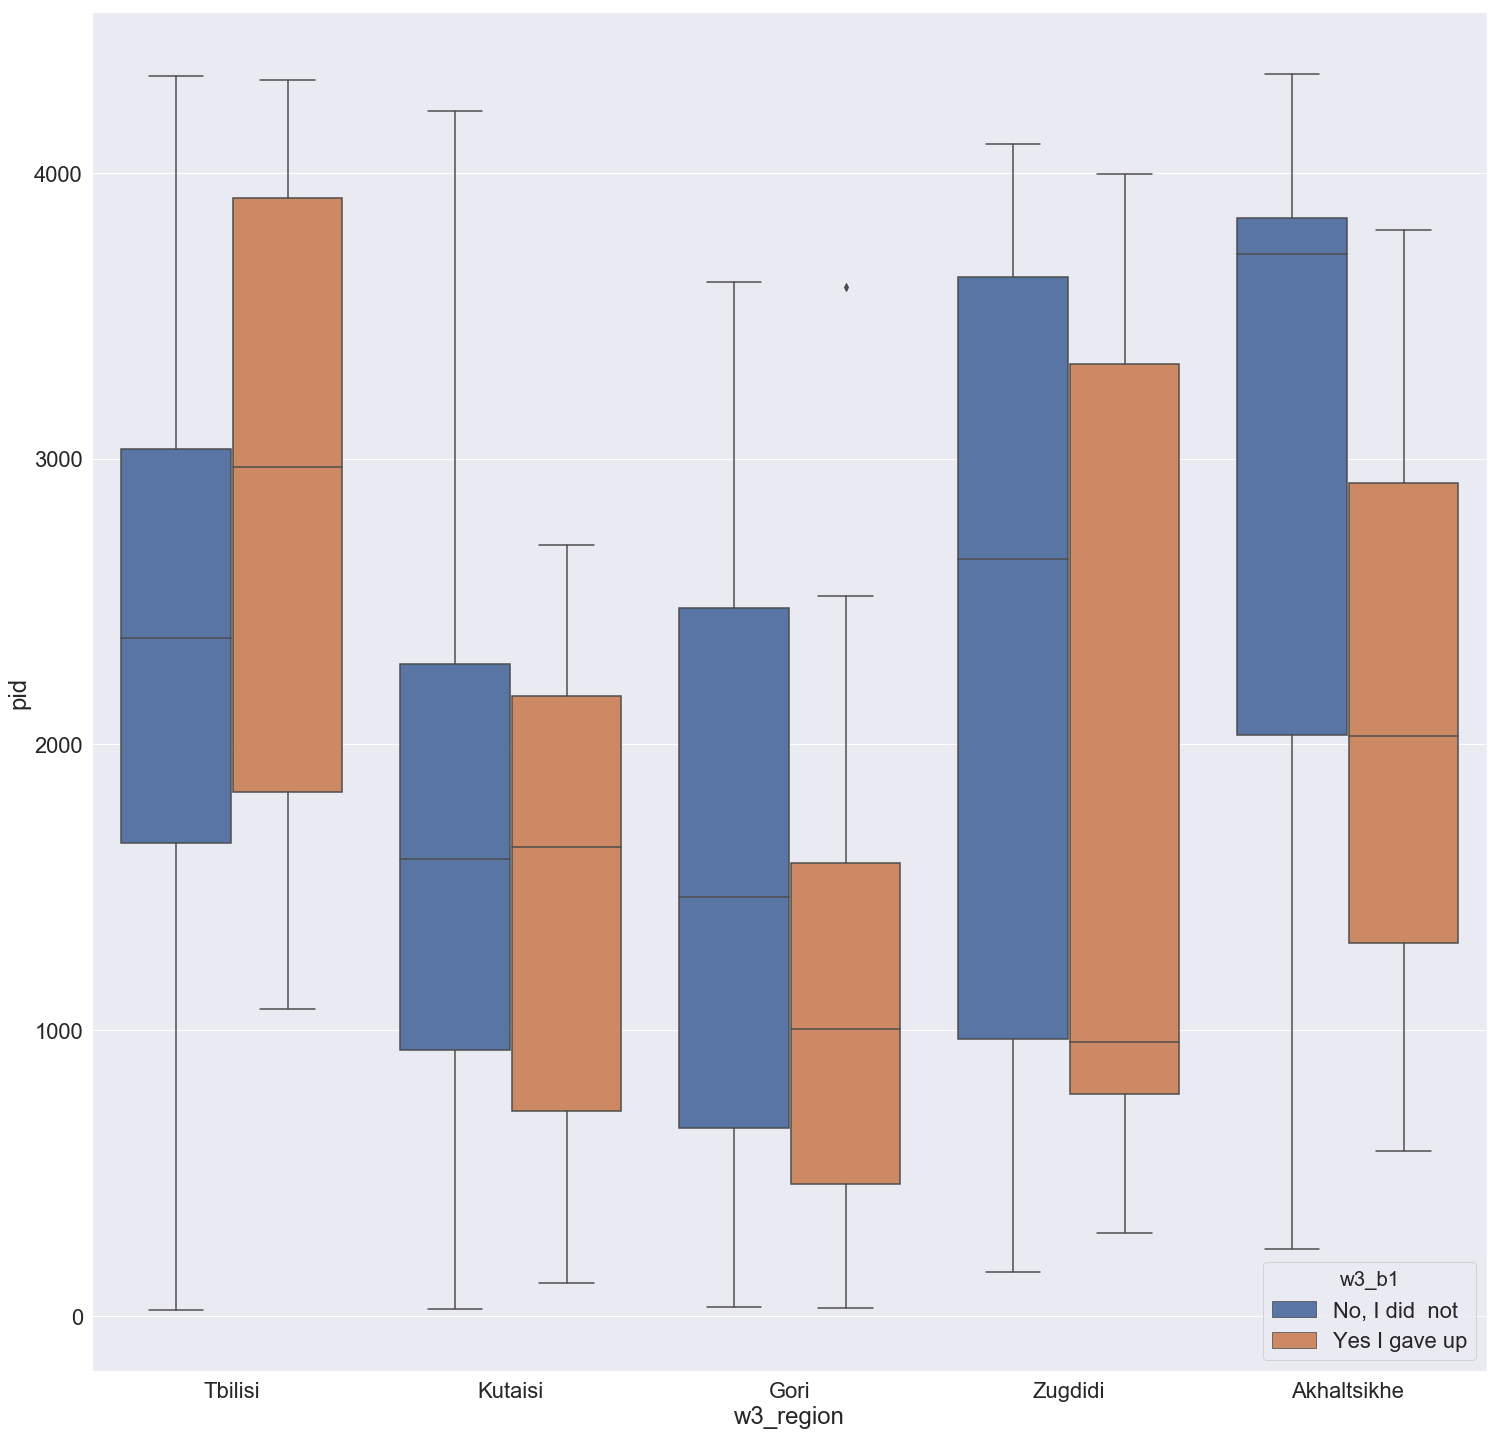

In [16]:
 plt.figure(figsize=(25,25))
sns.set(font_scale = 2)
sns.boxplot(data = df, x = 'w3_region', y = 'pid', hue = 'w3_b1' )
plt.show()

In [8]:
df['W3_age_bins'] = pd.cut(x=df['w3_age'], bins=[19, 29, 39, 49, 59,69,79,89])

In [9]:
df['W2_age_bins'] = pd.cut(x=df['w2_age'], bins=[19, 29, 39, 49, 59,69,79,89])

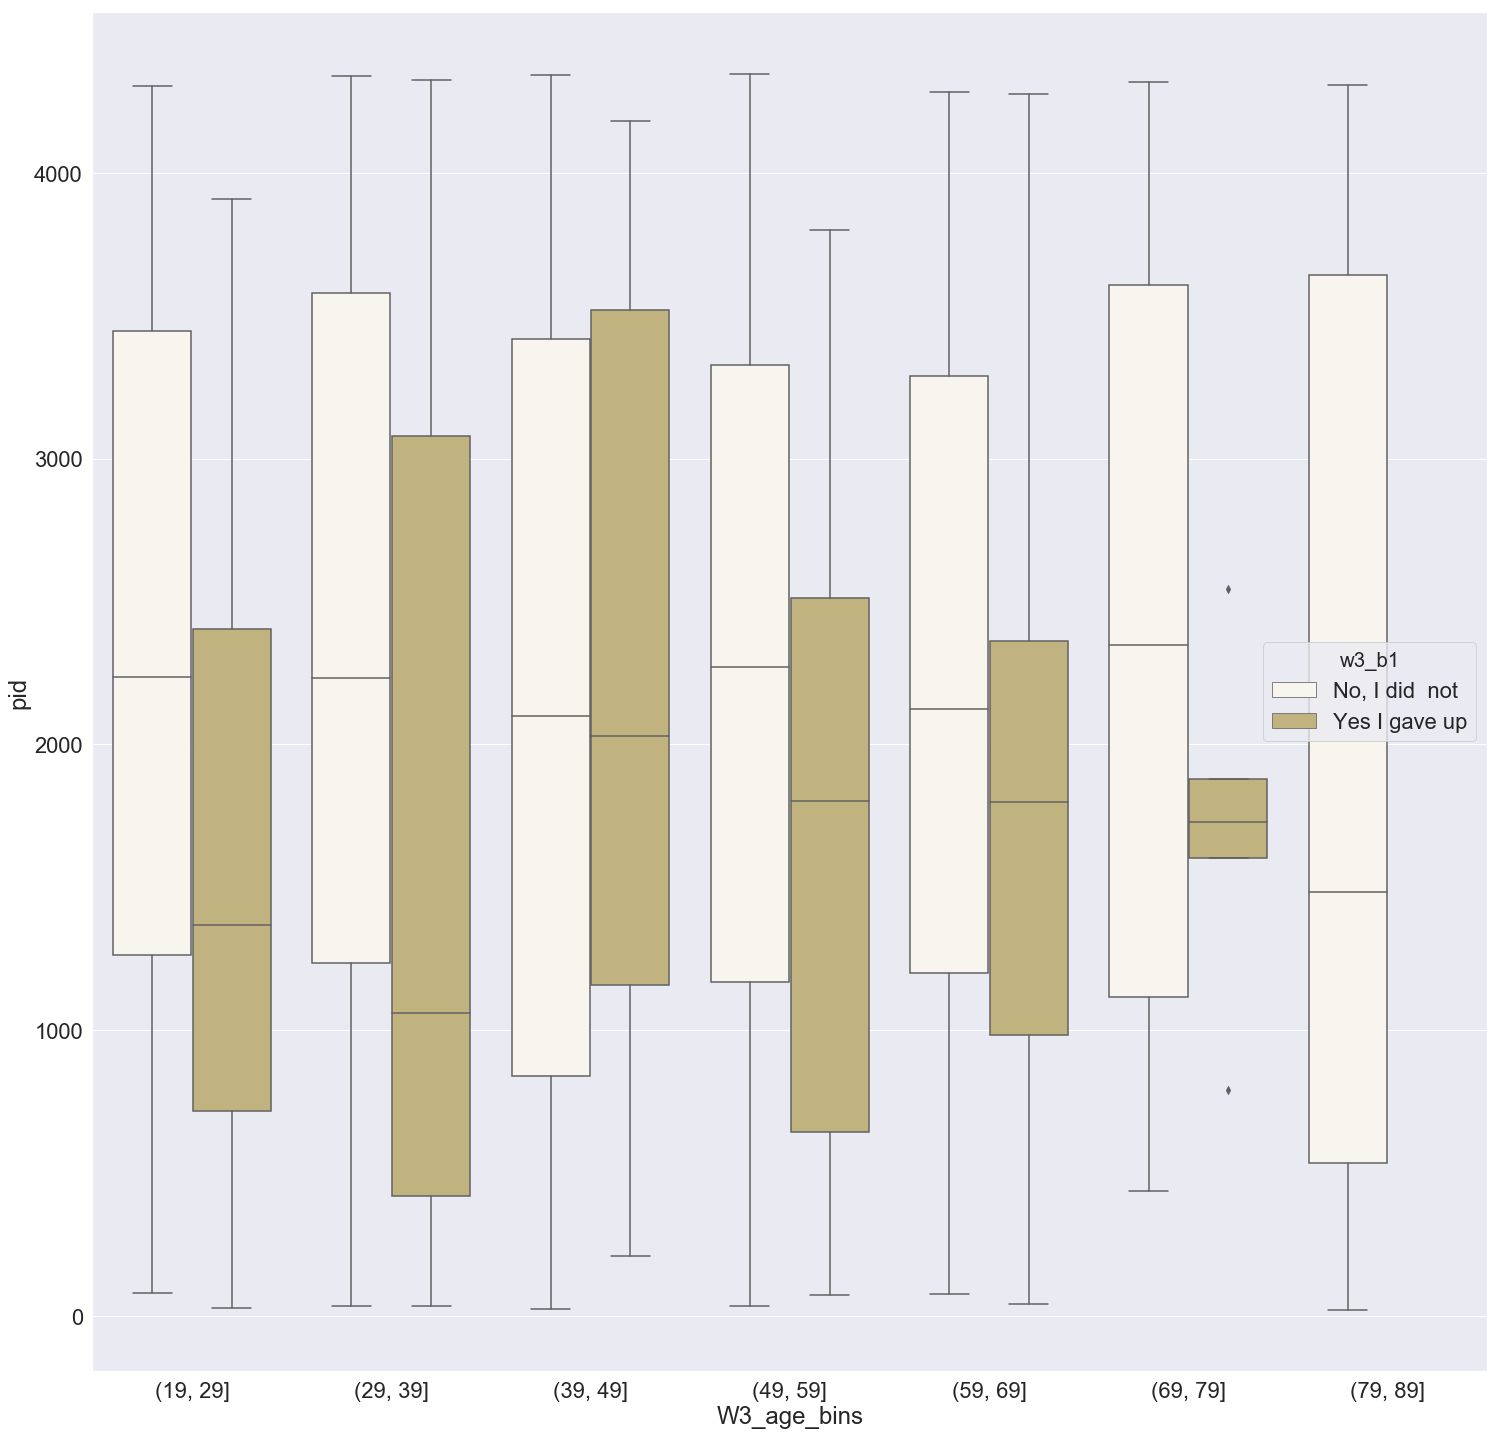

In [19]:
 plt.figure(figsize=(25,25))
sns.set(font_scale = 2)
sns.boxplot(data = df, x = 'W3_age_bins', y = 'pid', hue = 'w3_b1', color = 'y' )
plt.show()

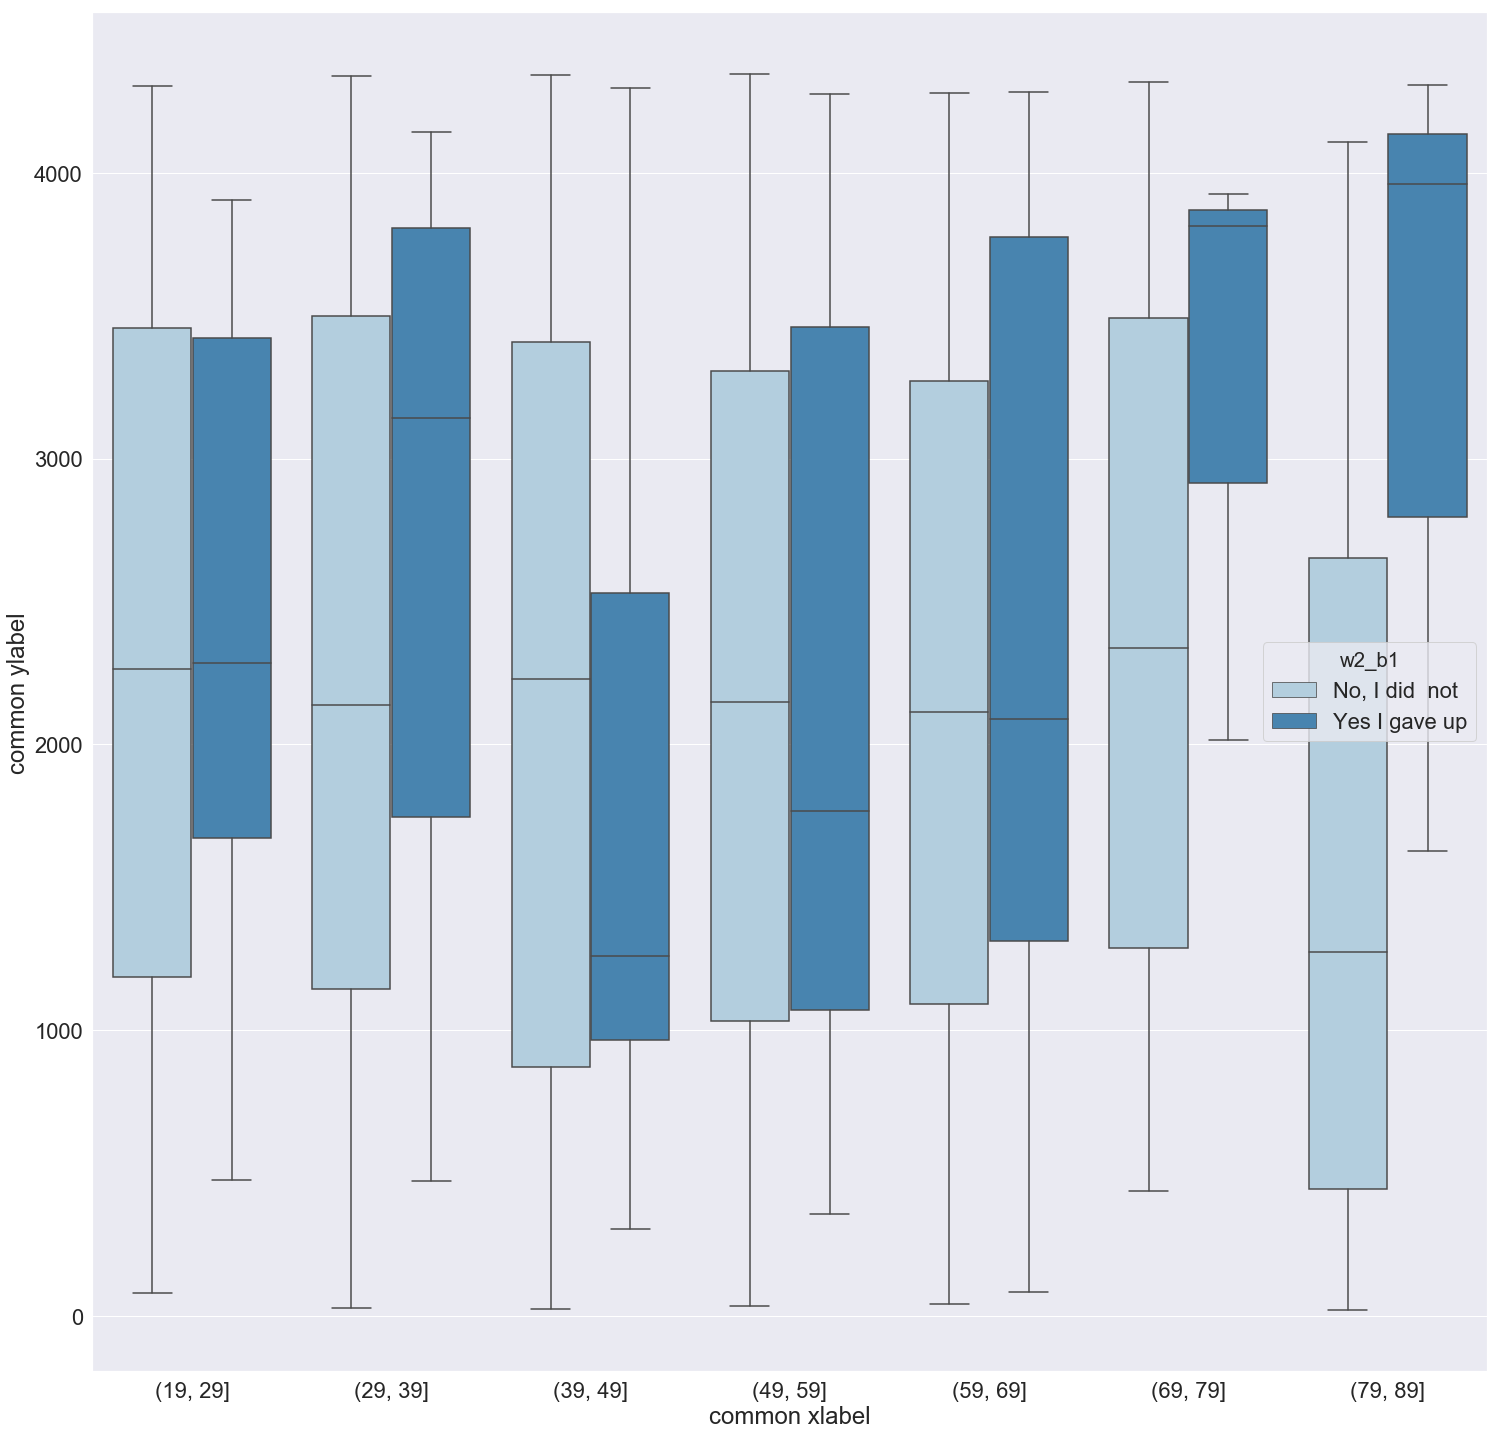

In [20]:
 plt.figure(figsize=(25,25))
sns.set(font_scale = 2)
ax =  sns.boxplot(data = df, x = 'W2_age_bins', y = 'pid', hue = 'w2_b1', color = 'g', palette= 'Blues')
ax.set(xlabel='common xlabel', ylabel='common ylabel')
plt.show()

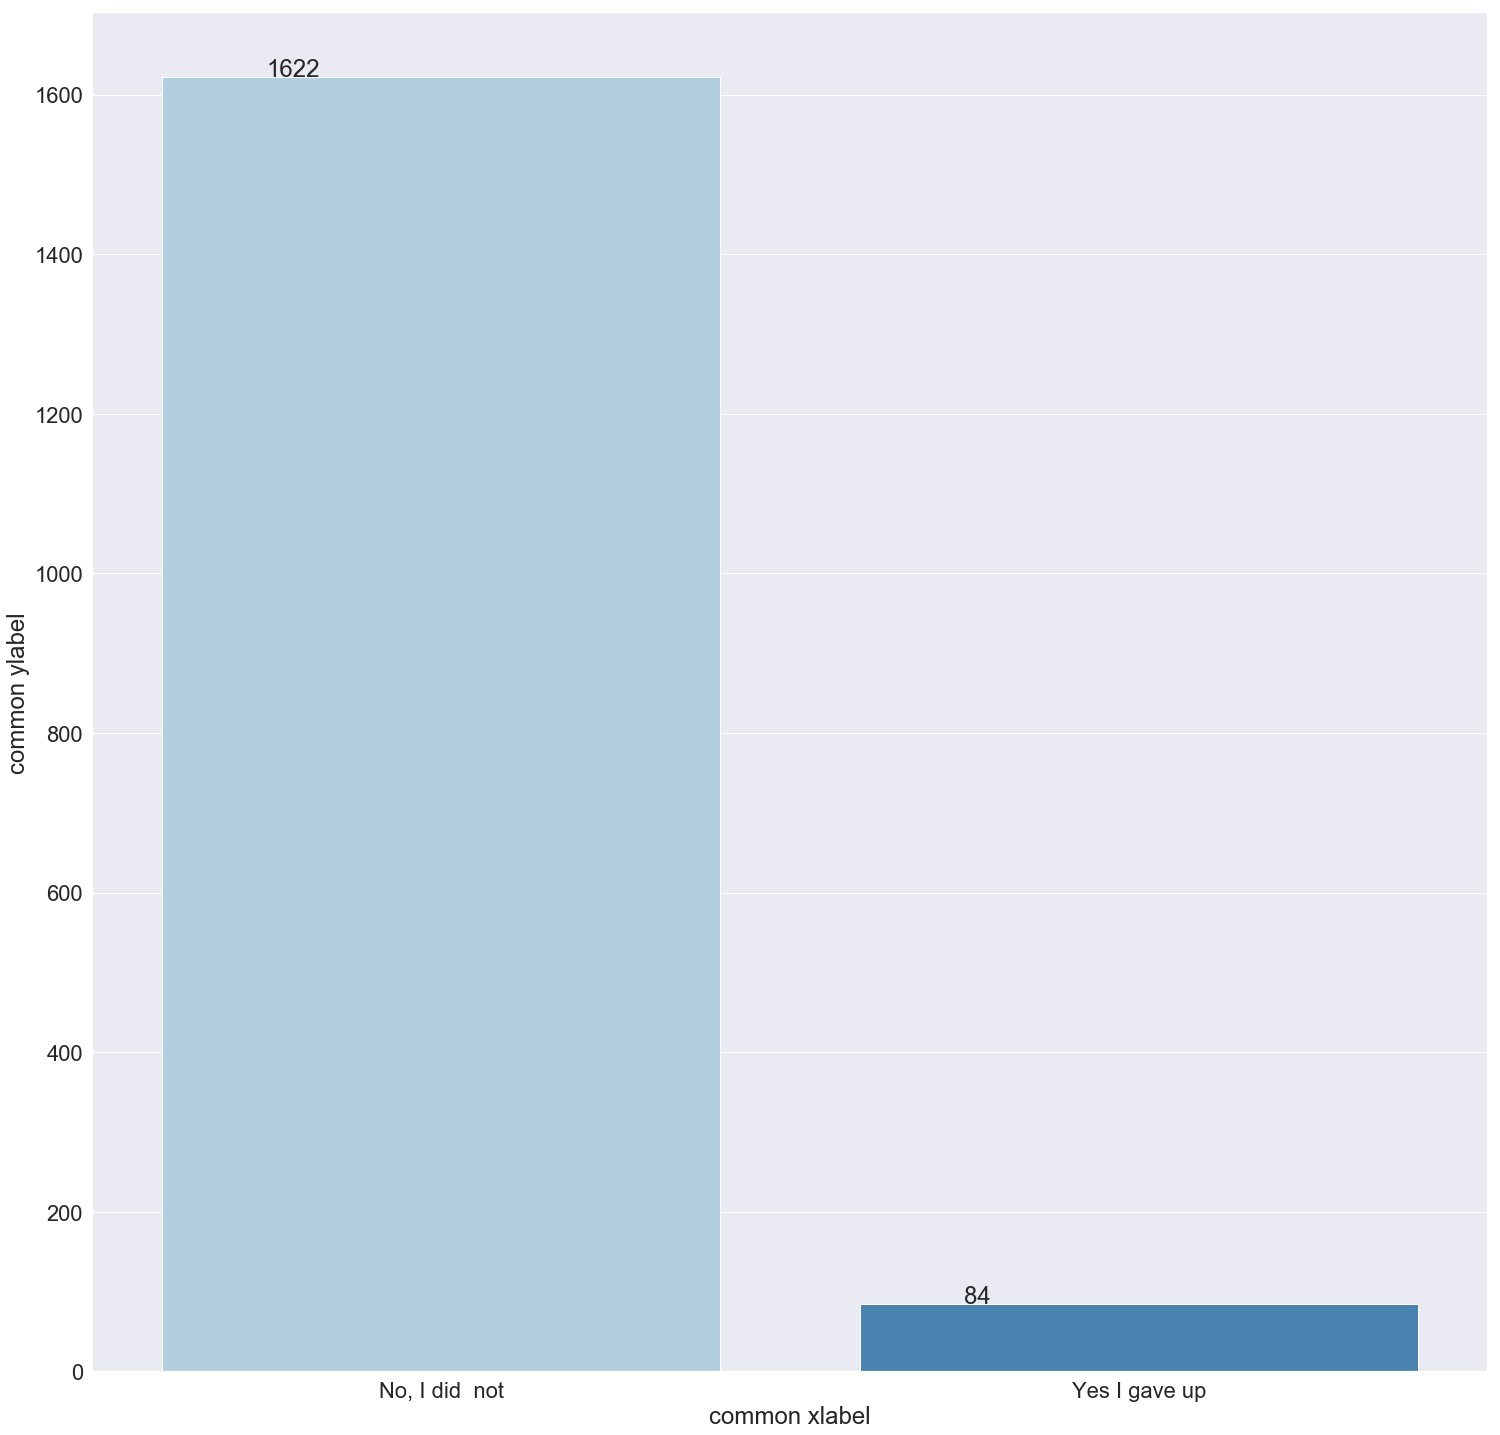

In [21]:
 plt.figure(figsize=(25,25))
sns.set(font_scale = 2)
ax =  sns.countplot(data = df,  x  = 'w2_b1', color = 'g', palette= 'Blues')
ax.set(xlabel='common xlabel', ylabel='common ylabel')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

plt.show()

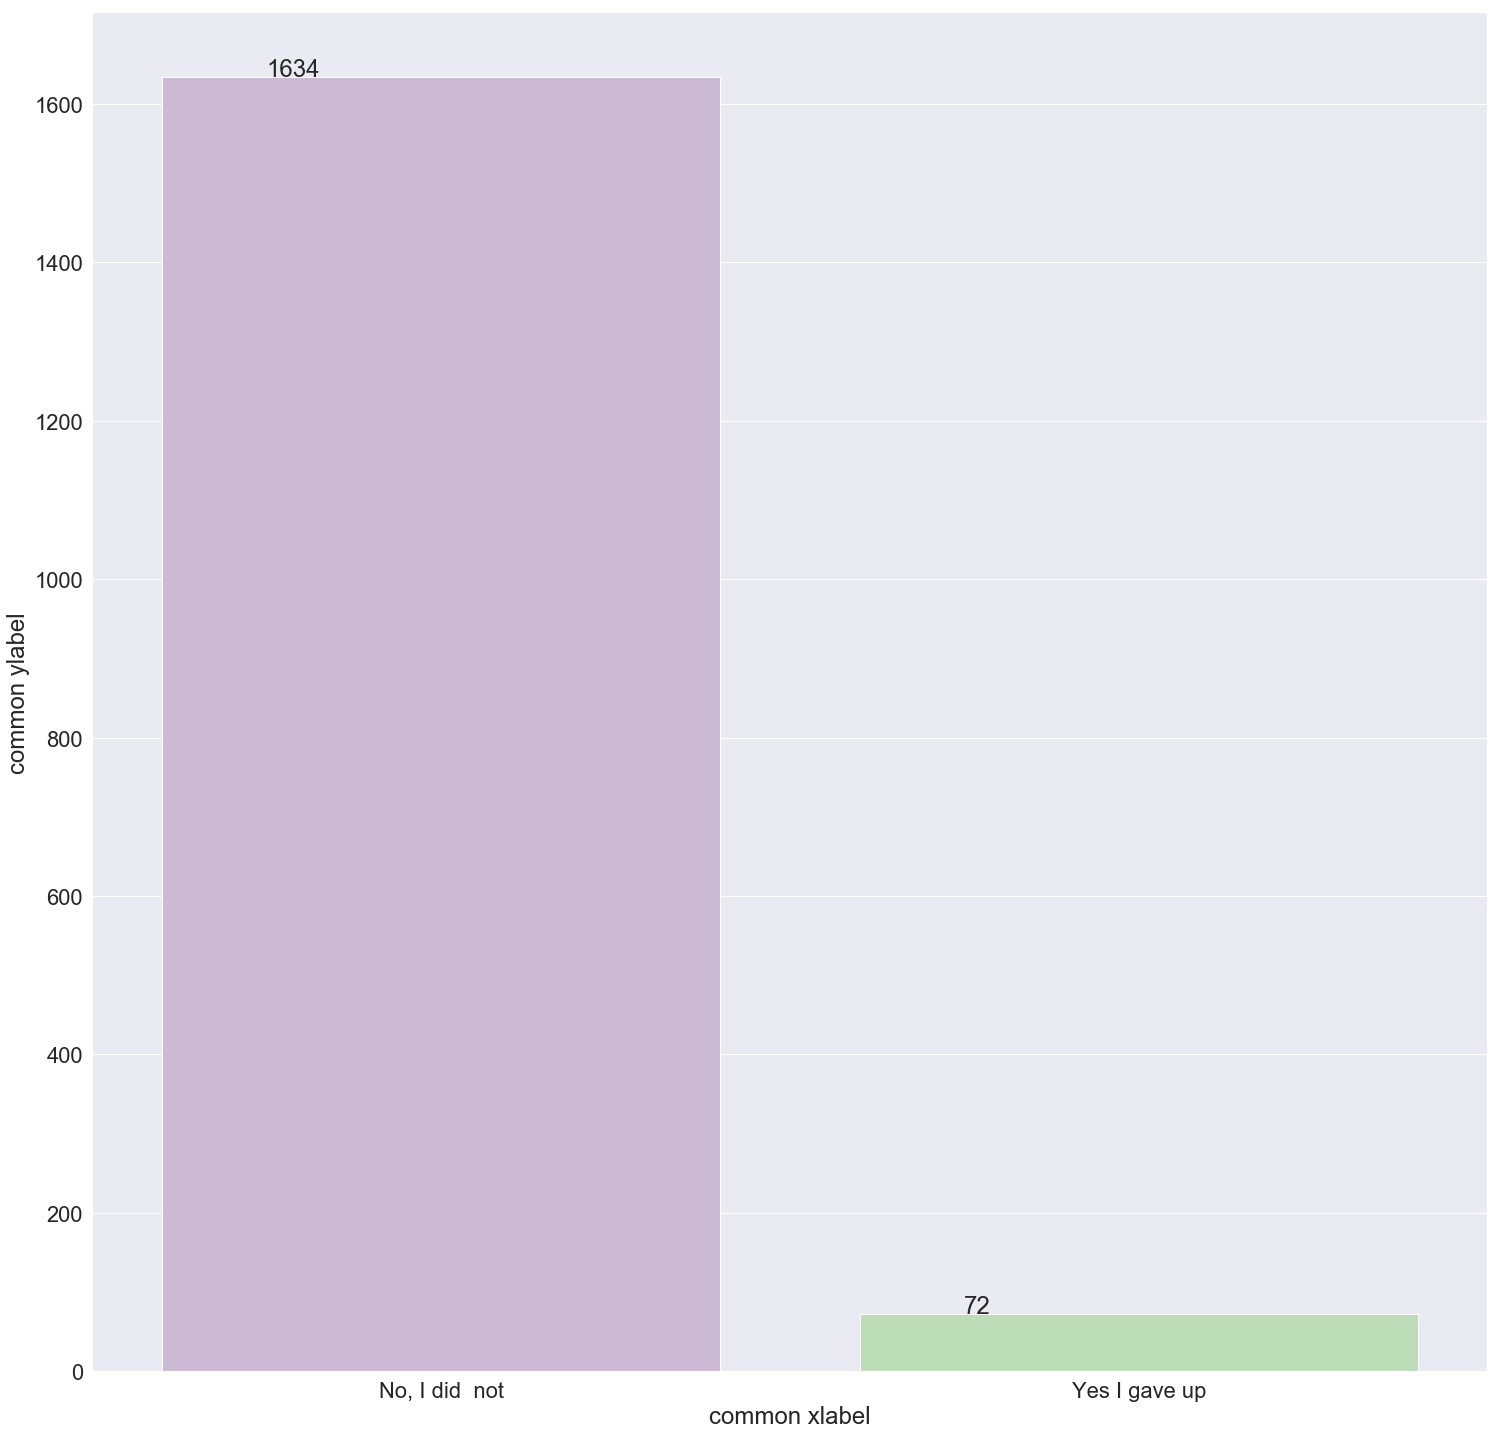

In [22]:
 plt.figure(figsize=(25,25))
sns.set(font_scale = 2)
ax =  sns.countplot(data = df,  x  = 'w3_b1', color = 'r', palette= 'PRGn')
ax.set(xlabel='common xlabel', ylabel='common ylabel')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

In [23]:
import statsmodels.stats.api as sms
from scipy import stats as st

In [28]:
obs = 1706
wave_1_c = 84/1706
wave_2_c = 72/1706
    

In [31]:
wave_2_c

0.04220398593200469

In [25]:
from scipy.stats import chisquare

In [26]:
print((wave_1_c -wave_2_c)/wave_2_c)

0.16666666666666663


In [27]:
df.head()

,pid,w3_region,w3_age,w3_gen,w3_b1,w2_region,hhid,w2_age,w2_gen,w2_b1,w1_region,w1_gen,w1_age,w1_smk_type,w2_smk_type,w3_smk_type,W3_age_bins,W2_age_bins
0,23,Tbilisi,82,Male,"No, I did not",Tbilisi,23,82,Male,"No, I did not",Tbilisi,Male,81,Filtered cigarettes,Filtered cigarettes only,Unfiltered cigarettes only,"(79, 89]","(79, 89]"
1,26,Kutaisi,45,Male,"No, I did not",Kutaisi,26,44,Male,"No, I did not",Kutaisi,Male,41,Filtered cigarettes,Filtered cigarettes only,Filtered cigarettes only,"(39, 49]","(39, 49]"
2,28,Kutaisi,47,Male,"No, I did not",Kutaisi,28,46,Male,"No, I did not",Kutaisi,Male,45,Filtered cigarettes,Filtered cigarettes only,Filtered cigarettes only,"(39, 49]","(39, 49]"
3,29,Gori,29,Male,Yes I gave up,Gori,29,30,Male,"No, I did not",Gori,Male,27,Filtered cigarettes,Filtered cigarettes only,NaN,"(19, 29]","(29, 39]"
4,31,Gori,43,Male,"No, I did not",Gori,31,42,Male,"No, I did not",Gori,Male,41,Filtered cigarettes,Filtered cigarettes only,Filtered cigarettes only,"(39, 49]","(39, 49]"


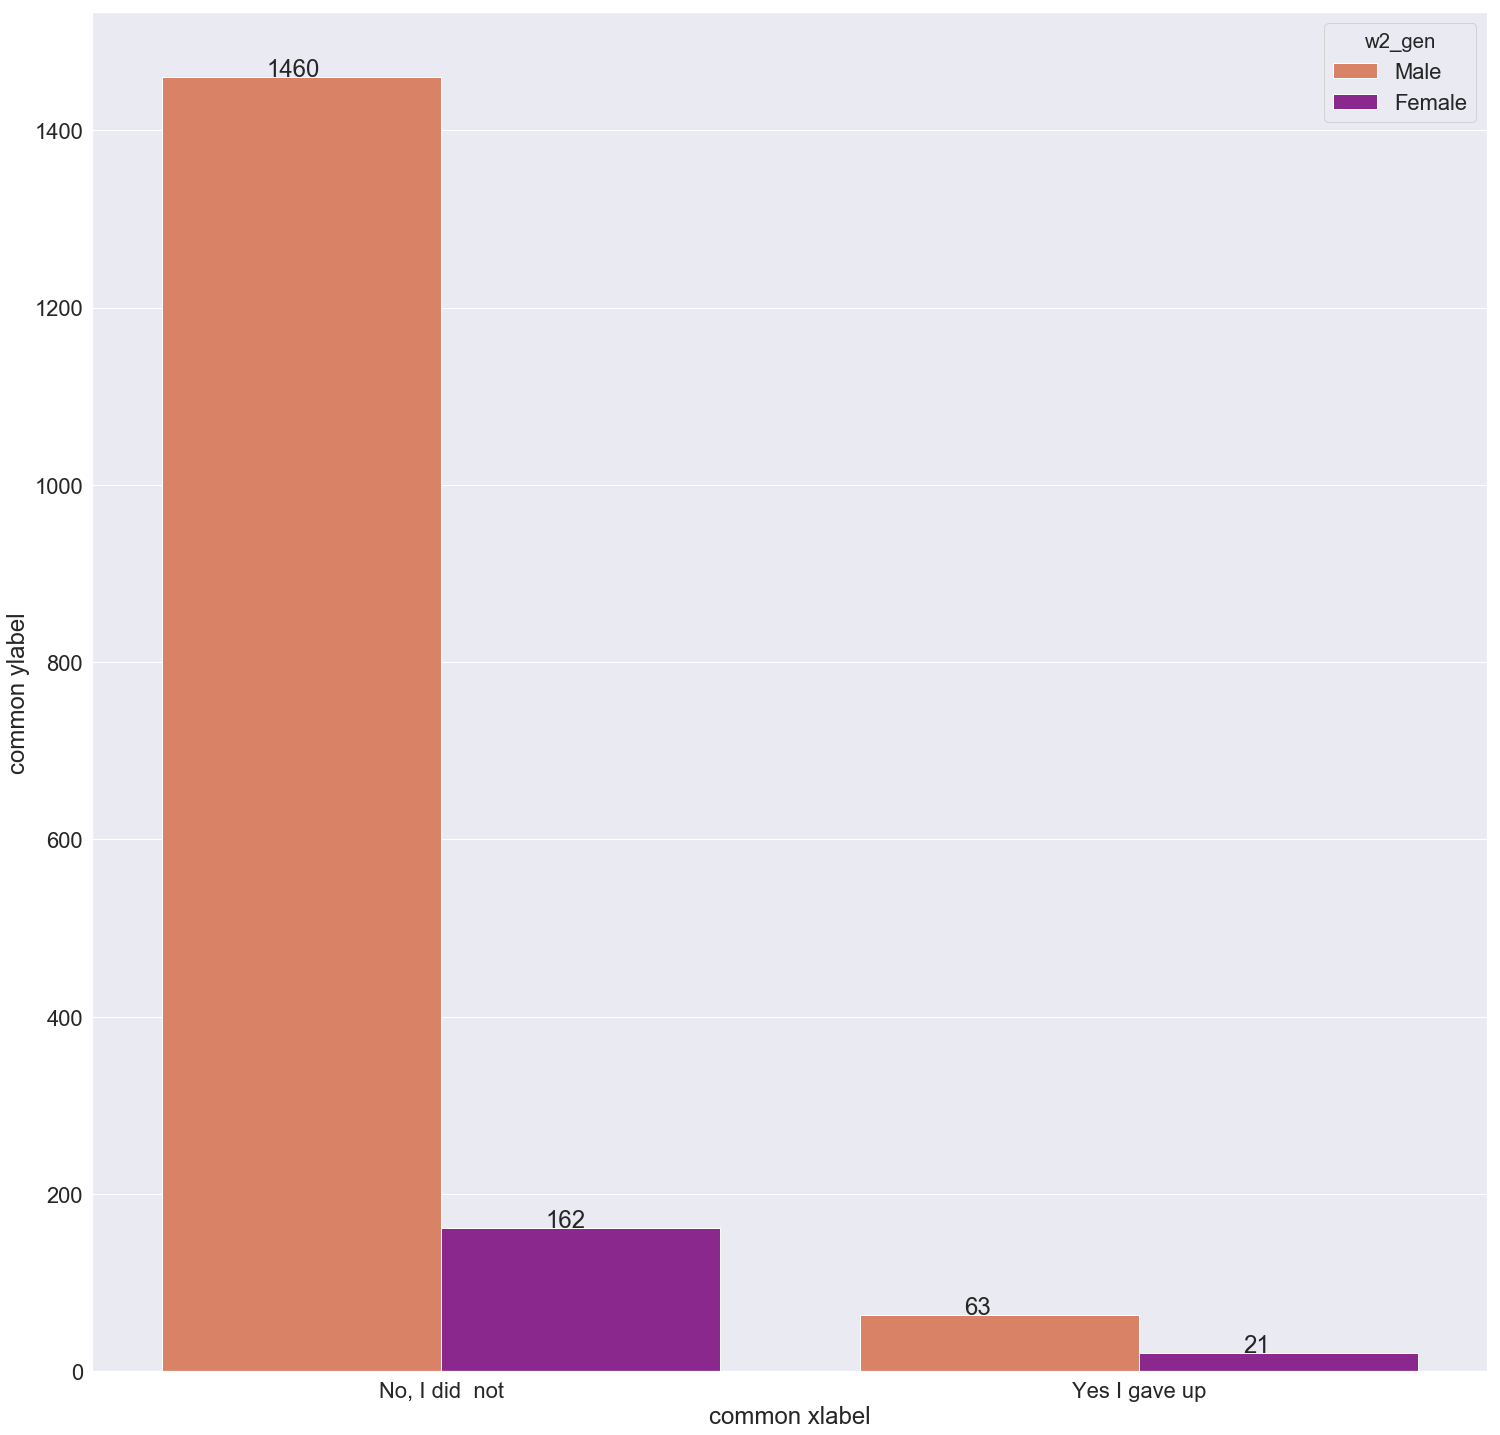

In [33]:
 plt.figure(figsize=(25,25))
sns.set(font_scale = 2)
ax =  sns.countplot(data = df,  x  = 'w2_b1', hue = 'w2_gen',  color = 'g', palette= 'plasma_r')
ax.set(xlabel='common xlabel', ylabel='common ylabel')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

plt.show()

In [41]:
male =  63/(63+1460)
female = 21/(162+21)

In [42]:
female

0.11475409836065574

In [33]:
print((female-male)/female)

0.639527248850952


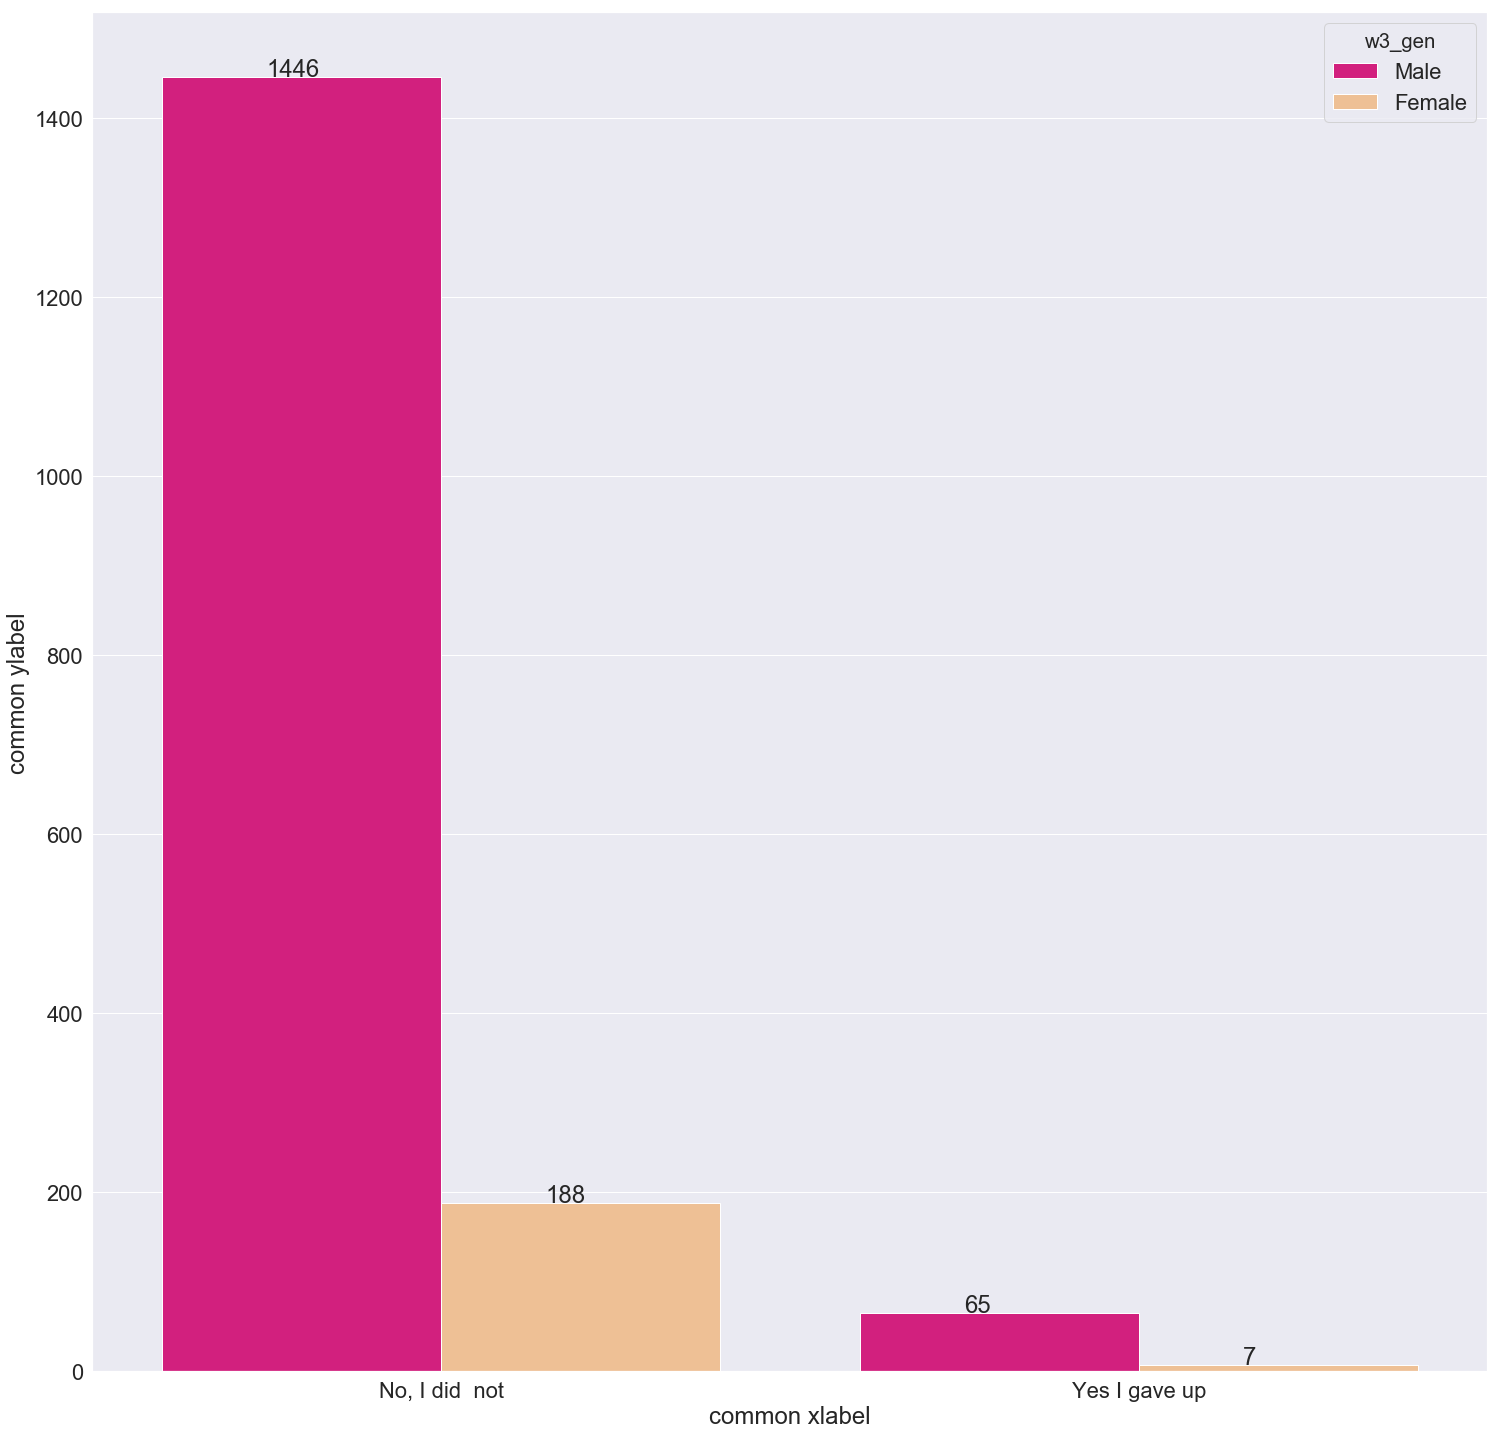

In [35]:
 plt.figure(figsize=(25,25))
sns.set(font_scale = 2)
ax =  sns.countplot(data = df,  x  = 'w3_b1', hue = 'w3_gen',  color = 'g', palette= 'Accent_r')
ax.set(xlabel='common xlabel', ylabel='common ylabel')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

plt.show()

In [43]:
male =  65/(65+1446)
female = 7/(188+7)

In [44]:
male

0.04301786896095301

In [45]:
print((female-male)/female)

-0.19835492105511973


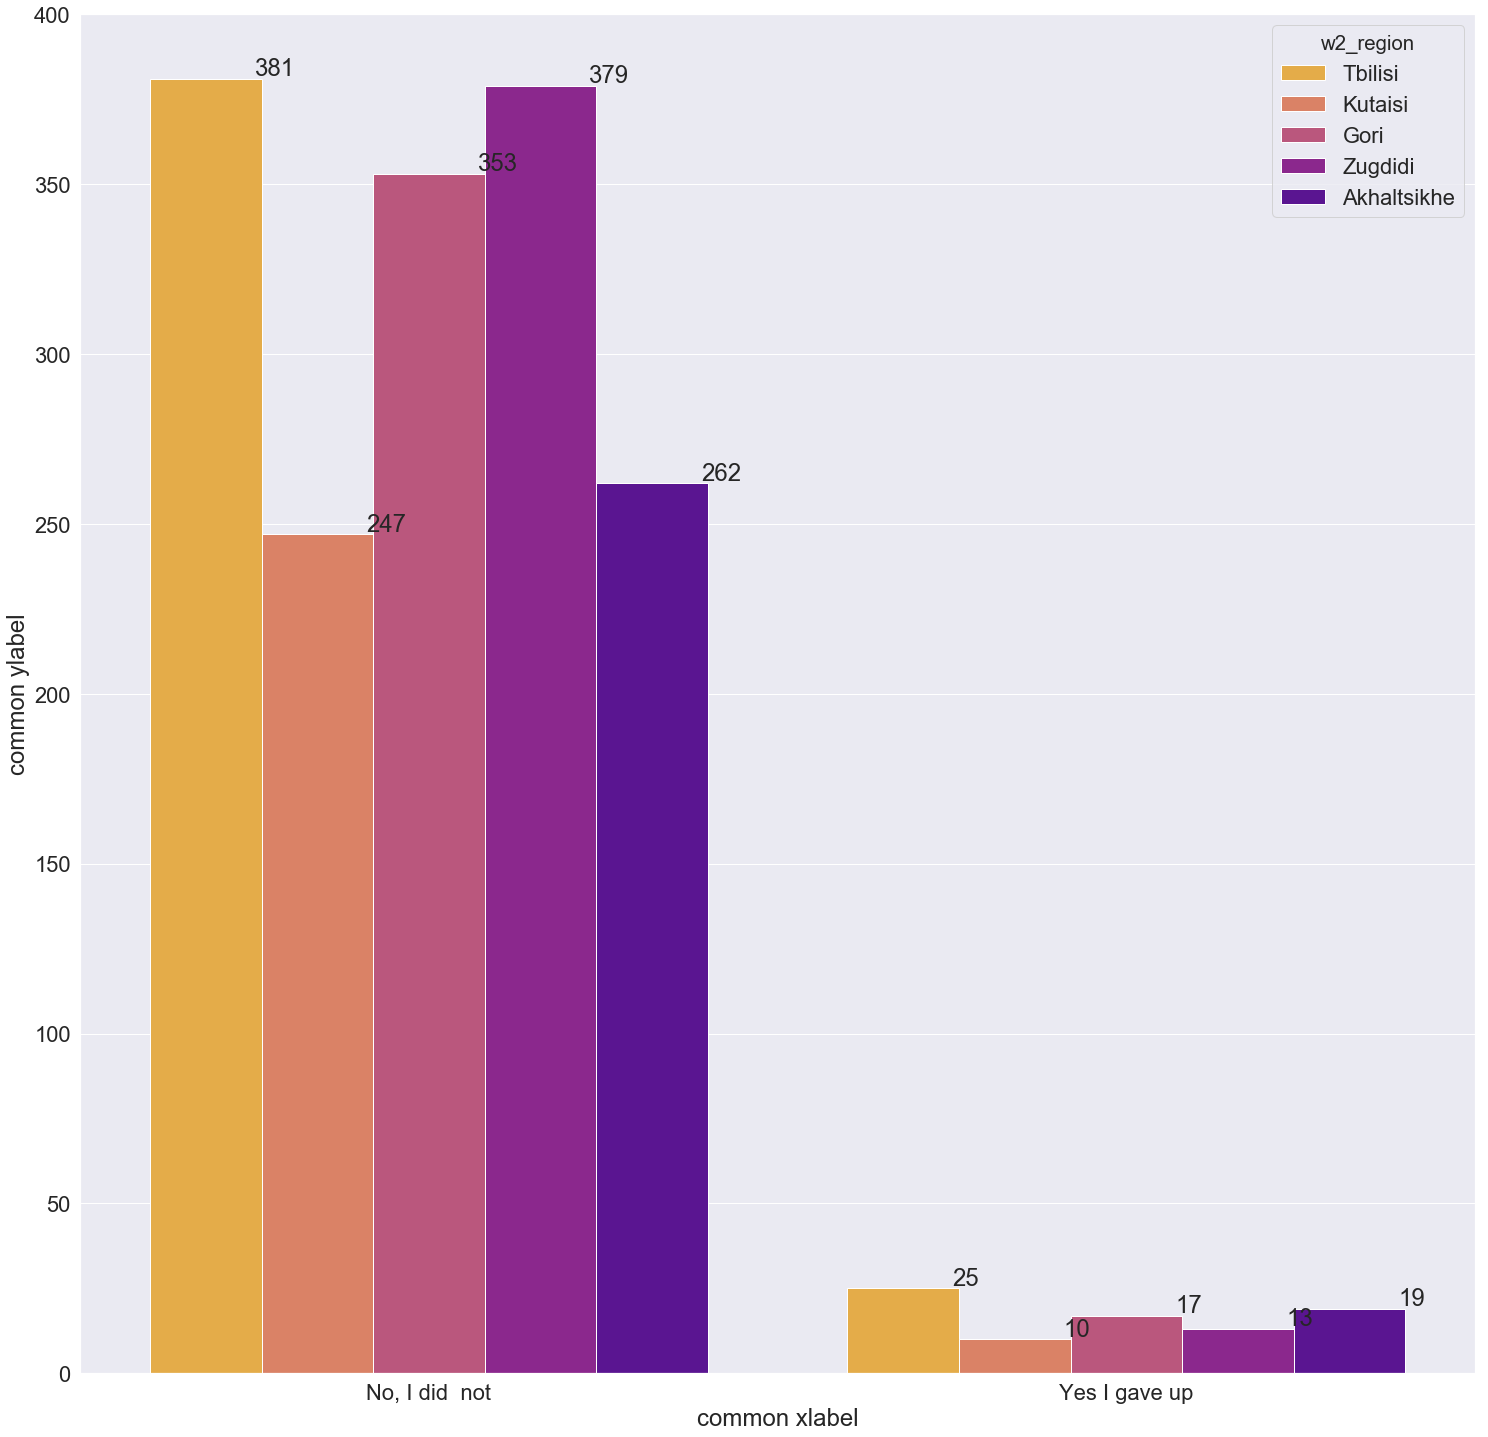

In [47]:
 plt.figure(figsize=(25,25))
sns.set(font_scale = 2)
ax =  sns.countplot(data = df,  x  = 'w2_b1', hue = 'w2_region',  color = 'g', palette= 'plasma_r')
ax.set(xlabel='common xlabel', ylabel='common ylabel')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

plt.show()

In [50]:
ddd = df.groupby(['w2_region', 'w2_b1' ]).agg({'pid': 'count'})

In [69]:
jj =  ddd.reset_index()
pidf = jj.groupby(['w2_region']).agg({'pid':'sum'})
jj =  jj[jj['w2_b1'] == 'Yes I gave up']

In [68]:
al =  pidf.reset_index()

In [70]:
join =  pd.merge(al, jj, on = ['w2_region'], how = 'inner')

In [72]:
join['ratio'] = join['pid_y']/join['pid_x']
join

,w2_region,pid_x,w2_b1,pid_y,ratio
0,Akhaltsikhe,281,Yes I gave up,19,0.067616
1,Gori,370,Yes I gave up,17,0.045946
2,Kutaisi,257,Yes I gave up,10,0.038911
3,Tbilisi,406,Yes I gave up,25,0.061576
4,Zugdidi,392,Yes I gave up,13,0.033163


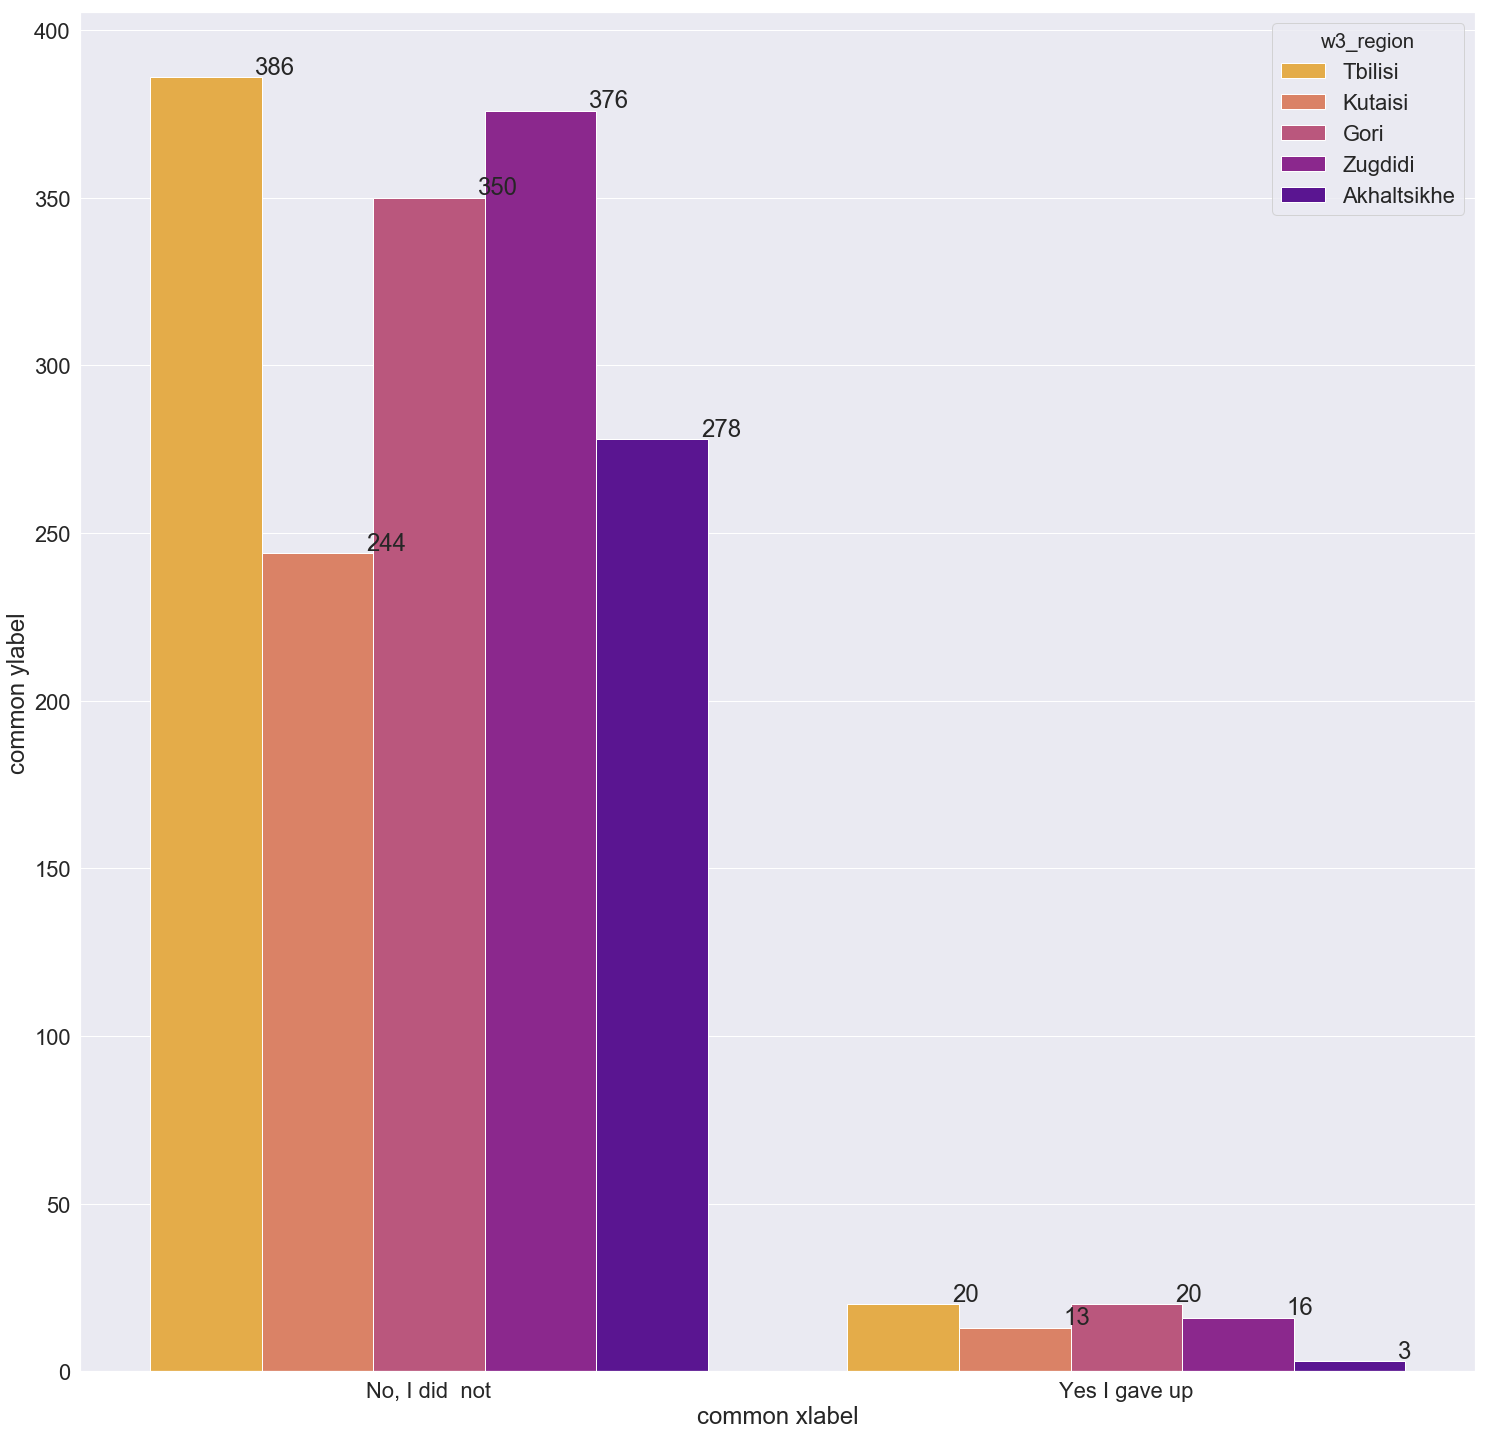

In [48]:
 plt.figure(figsize=(25,25))
sns.set(font_scale = 2)
ax =  sns.countplot(data = df,  x  = 'w3_b1', hue = 'w3_region',  color = 'g', palette= 'plasma_r')
ax.set(xlabel='common xlabel', ylabel='common ylabel')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

plt.show()

In [73]:
ddd = df.groupby(['w3_region', 'w3_b1' ]).agg({'pid': 'count'})

In [74]:
jj =  ddd.reset_index()
pidf = jj.groupby(['w3_region']).agg({'pid':'sum'})
jj =  jj[jj['w3_b1'] == 'Yes I gave up']

In [75]:
al =  pidf.reset_index()

In [77]:
join =  pd.merge(al, jj, on = ['w3_region'], how = 'inner')

In [78]:
join['ratio'] = join['pid_y']/join['pid_x']
join

,w3_region,pid_x,w3_b1,pid_y,ratio
0,Akhaltsikhe,281,Yes I gave up,3,0.010676
1,Gori,370,Yes I gave up,20,0.054054
2,Kutaisi,257,Yes I gave up,13,0.050584
3,Tbilisi,406,Yes I gave up,20,0.049261
4,Zugdidi,392,Yes I gave up,16,0.040816


In [86]:
df[(df['w2_b1'] =='Yes I gave up') & (df['w3_b1'] <='No, I did not' )].shape[0]

84

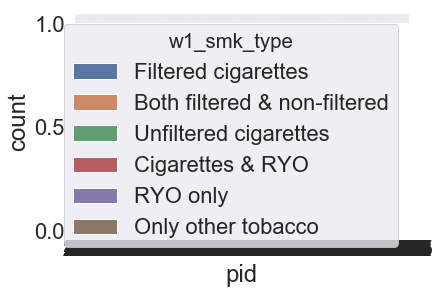

In [90]:
df

,pid,w3_region,w3_age,w3_gen,w3_b1,w2_region,hhid,w2_age,w2_gen,w2_b1,w1_region,w1_gen,w1_age,w1_smk_type,w2_smk_type,w3_smk_type,W3_age_bins,W2_age_bins
0,23,Tbilisi,82,Male,"No, I did not",Tbilisi,23,82,Male,"No, I did not",Tbilisi,Male,81,Filtered cigarettes,Filtered cigarettes only,Unfiltered cigarettes only,"(79, 89]","(79, 89]"
1,26,Kutaisi,45,Male,"No, I did not",Kutaisi,26,44,Male,"No, I did not",Kutaisi,Male,41,Filtered cigarettes,Filtered cigarettes only,Filtered cigarettes only,"(39, 49]","(39, 49]"
2,28,Kutaisi,47,Male,"No, I did not",Kutaisi,28,46,Male,"No, I did not",Kutaisi,Male,45,Filtered cigarettes,Filtered cigarettes only,Filtered cigarettes only,"(39, 49]","(39, 49]"
3,29,Gori,29,Male,Yes I gave up,Gori,29,30,Male,"No, I did not",Gori,Male,27,Filtered cigarettes,Filtered cigarettes only,NaN,"(19, 29]","(29, 39]"
4,31,Gori,43,Male,"No, I did not",Gori,31,42,Male,"No, I did not",Gori,Male,41,Filtered cigarettes,Filtered cigarettes only,Filtered cigarettes only,"(39, 49]","(39, 49]"
5,35,Gori,39,Male,"No, I did not",Gori,35,38,Male,"No, I did not",Gori,Male,37,Filtered cigarettes,Unfiltered cigarettes only,Filtered cigarettes only,"(29, 39]","(29, 39]"
6,36,Gori,50,Male,"No, I did not",Gori,36,50,Male,"No, I did not",Gori,Male,49,Filtered cigarettes,Filtered cigarettes only,Filtered cigarettes only,"(49, 59]","(49, 59]"
7,37,Gori,36,Male,Yes I gave up,Gori,37,36,Male,"No, I did not",Gori,Male,34,Both filtered & non-filtered,Unfiltered cigarettes only,NaN,"(29, 39]","(29, 39]"
8,40,Gori,52,Male,"No, I did not",Gori,40,51,Male,"No, I did not",Gori,Male,51,Filtered cigarettes,Unfiltered cigarettes only,RYO only,"(49, 59]","(49, 59]"
9,42,Gori,66,Male,Yes I gave up,Gori,42,66,Male,"No, I did not",Gori,Male,65,Filtered cigarettes,Unfiltered cigarettes only,NaN,"(59, 69]","(59, 69]"


In [100]:
df.head()

,pid,w3_region,w3_age,w3_gen,w3_b1,w2_region,hhid,w2_age,w2_gen,w2_b1,w1_region,w1_gen,w1_age,w1_smk_type,w2_smk_type,w3_smk_type,W3_age_bins,W2_age_bins
0,23,Tbilisi,82,Male,"No, I did not",Tbilisi,23,82,Male,"No, I did not",Tbilisi,Male,81,Filtered cigarettes,Filtered cigarettes only,Unfiltered cigarettes only,"(79, 89]","(79, 89]"
1,26,Kutaisi,45,Male,"No, I did not",Kutaisi,26,44,Male,"No, I did not",Kutaisi,Male,41,Filtered cigarettes,Filtered cigarettes only,Filtered cigarettes only,"(39, 49]","(39, 49]"
2,28,Kutaisi,47,Male,"No, I did not",Kutaisi,28,46,Male,"No, I did not",Kutaisi,Male,45,Filtered cigarettes,Filtered cigarettes only,Filtered cigarettes only,"(39, 49]","(39, 49]"
3,29,Gori,29,Male,Yes I gave up,Gori,29,30,Male,"No, I did not",Gori,Male,27,Filtered cigarettes,Filtered cigarettes only,NaN,"(19, 29]","(29, 39]"
4,31,Gori,43,Male,"No, I did not",Gori,31,42,Male,"No, I did not",Gori,Male,41,Filtered cigarettes,Filtered cigarettes only,Filtered cigarettes only,"(39, 49]","(39, 49]"


# sns.set(font_scale = 4)
plt.figure(figsize=(25,25))
fig, ax =plt.subplots(1,3, figsize=(50,100))

sns.countplot(df['w1_smk_type'], ax=ax[0])
sns.countplot(df['w2_smk_type'], ax=ax[1])
sns.countplot(df['w3_smk_type'], ax=ax[2])
fig.show()





<Figure size 1800x1800 with 0 Axes>

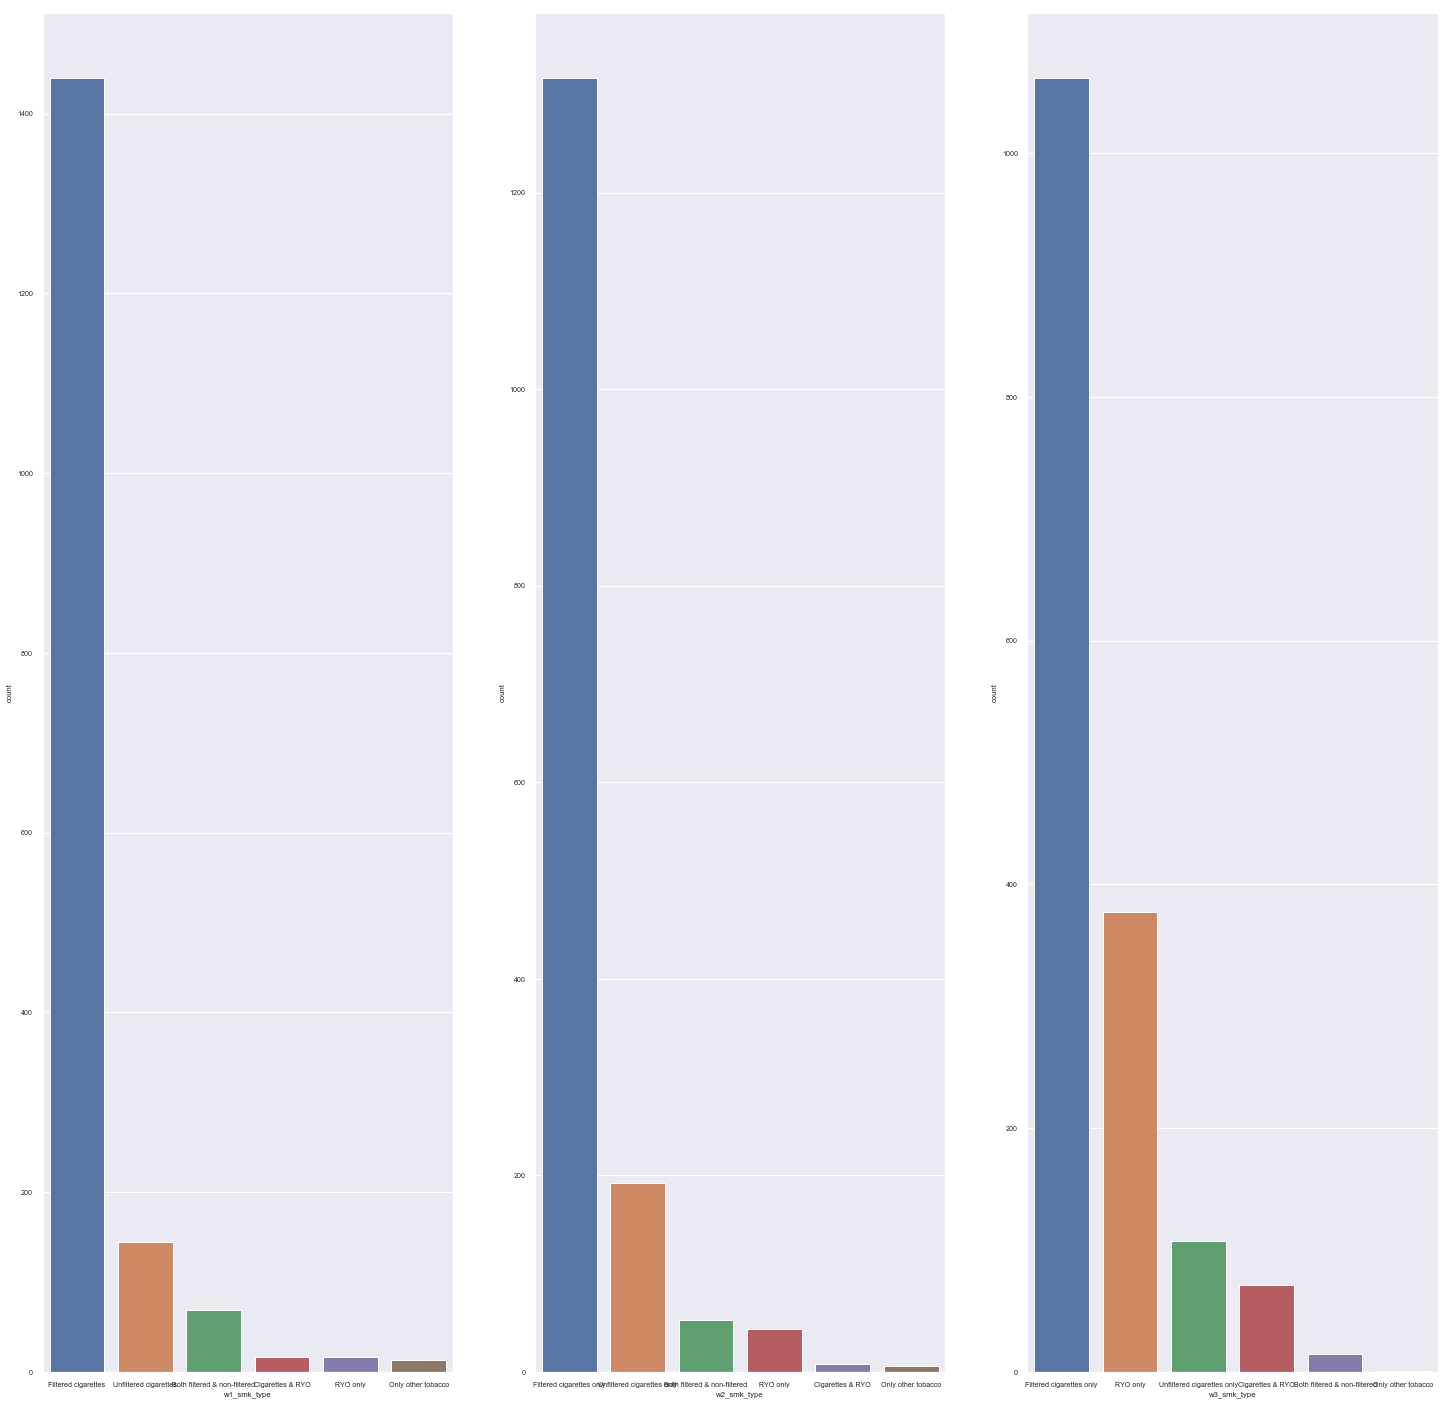

In [76]:
 sns.set(font_scale = 0.65)
plt.figure(figsize=(25,25))
fig, ax =plt.subplots(1,3, figsize=(25,25))

ax1 = sns.countplot(df['w1_smk_type'], ax=ax[0],order= df['w1_smk_type'].value_counts().index)
ax2 = sns.countplot(df['w2_smk_type'], ax=ax[1], order= df['w2_smk_type'].value_counts().index)
ax3 =  sns.countplot(df['w3_smk_type'], ax=ax[2], order= df['w3_smk_type'].value_counts().index)
fig.show()





In [55]:
ax3 =  sns.countplot(df['w3_smk_type'], ax=ax[2])


In [56]:
ax3